## EDA - Exploratory Data Analysis
Perform Exploratory Data Analysis of cost prediction dataset and draw valuable inferences from it. User different mathematical and statistical technique to understand the nature of the data. Use different analytical and machine learning algorithms.

1. **Feature Engineering**
    - CAC - Customer Aquisation Cost
    - ACOP - Acquired Cost Over Profit
<br></br>
2. **Variance and Distribution**
    - Spread of CAC w.r.t ggregation of total customers based on -
        - Store Level Data
        - Food Category Level Data
        - Customer Attributes e.g. Gender, Salary etc.
        - Product Level Data
<br></br>
3. **Correlation Check**
    - Heat Maps for numerical variables
    - Scatter Plots for numerical variables
<br></br>
4. **Outlier Detection**
    - Z-score method
    - Quantile Distribution method
    - Isolation Forest method

**o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o**

#### Import Libraries

In [105]:
# Import all ncecssary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import re
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot


#### Set global parameters

In [106]:
# set global parameters

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid', {'grid.color':'red'})
pd.set_option('display.max_colwidth', None)

#### Read data

In [107]:
# Read CSV file into the pandas dataframe

df = pd.read_csv('./Data/media prediction and its cost.csv')

In [108]:
# Rename the columns to remove parenthesis from the column names

df = df.rename(columns={'store_sales(in millions)':'store_sales',
                   'store_cost(in millions)':'store_cost',
                   'unit_sales(in millions)':'unit_sales',
                   'avg_cars_at home(approx)':'avg_cars_at_home',
                   'avg_cars_at home(approx).1':'avg_cars_at_home_1'})

In [109]:
# Get the glimpse of the dataset

df.head(2)

food_category food_department food_family  store_sales  store_cost  unit_sales         promotion_name sales_country marital_status gender  total_children            education member_card      occupation houseowner  avg_cars_at_home avg. yearly_income  num_children_at_home  avg_cars_at_home_1  brand_name   SRP  gross_weight  net_weight  recyclable_package  low_fat  units_per_case          store_type store_city store_state  store_sqft  grocery_sqft  frozen_sqft  meat_sqft  coffee_bar  video_store  salad_bar  prepared_food  florist          media_type    cost
0  Breakfast Foods    Frozen Foods        Food         7.36      2.7232         4.0           Bag Stuffers           USA              M      F             1.0  Partial High School      Normal  Skilled Manual          Y               1.0        $10K - $30K                   1.0                 1.0  Carrington  1.84          19.7        17.7                 1.0      0.0            17.0  Deluxe Supermarket      Salem          OR     27694.0       18670.0       5415.0     3610.0         1.0          1.0        1.0            1.0      1.0  Daily Paper, Radio  126.62
1  Breakfast Foods    Frozen Foods        Food         5.52      2.5944         3.0  Cash Register Lottery           USA              M      M             0.0     Bachelors Degree      Silver    Professional          Y               4.0        $50K - $70K                   0.0                 4.0  Carrington  1.84          19.7        17.7                 1.0      0.0            17.0  Deluxe Supermarket      Salem          OR     27694.0       18670.0       5415.0     3610.0         1.0          1.0        1.0            1.0      1.0  Daily Paper, Radio   59.86

In [110]:
# Check if the below two features are exact same. If yes we can drop one of those two.

print(df.loc[df['avg_cars_at_home'] == df['avg_cars_at_home_1']].shape)
print(df.loc[df['avg_cars_at_home'] != df['avg_cars_at_home_1']].shape)

(60428, 40)
(0, 40)


Below two features are exactly same as per the check done in above cell

- avg_cars_at_home
- avg_cars_at_home_1

In [111]:
# Drop the below mentioned feature as it is duplicated

df = df.drop(['avg_cars_at_home_1'], axis=1)

In [112]:
# Check total customer acquired cost w.r.t. Food Category

df_cost_by_food_cat = df.groupby(['food_category']).agg(
        total_cost = pd.NamedAgg('cost','sum')
        ).reset_index().sort_values('total_cost',ascending=False)

df_cost_by_food_cat.loc[df_cost_by_food_cat['total_cost'] >= 100000].head(10)


food_category  total_cost
44        Vegetables   737236.10
41       Snack Foods   689479.67
17             Dairy   378648.93
31              Meat   310636.56
24             Fruit   305382.04
28  Jams and Jellies   252969.65
0       Baking Goods   194346.39
4    Breakfast Foods   193475.48
3              Bread   178743.99
12       Canned Soup   173967.15

In [113]:
# calculate acop - acquired cost over profit w.r.t food category

df_acop_by_food_cat = df.groupby(['food_category']).agg(
                        total_sales=pd.NamedAgg('store_sales','sum'),
                        total_cost=pd.NamedAgg('store_cost','sum'),
                        total_units_sales=pd.NamedAgg('unit_sales','sum'),
                        total_aq_cost = pd.NamedAgg('cost','sum')
                        ).reset_index()

In [114]:
# Calculate acop - acquired cost over profit w.r.t. food category

df_acop_by_food_cat['Net_Profit']      = \
                                df_acop_by_food_cat['total_sales']-df_acop_by_food_cat['total_cost']
df_acop_by_food_cat['Marginal_Profit'] = \
                                df_acop_by_food_cat['Net_Profit']/df_acop_by_food_cat['total_units_sales']
df_acop_by_food_cat['total_aq_cost']   = \
                                df_acop_by_food_cat['total_aq_cost']/1000000
df_acop_by_food_cat['acop']            = \
                                df_acop_by_food_cat['total_aq_cost']/df_acop_by_food_cat['Net_Profit']
df_acop_by_food_cat.head()

food_category  total_sales  total_cost  total_units_sales  total_aq_cost  Net_Profit  Marginal_Profit      acop
0       Baking Goods     11313.59   4523.1481             6037.0       0.194346   6790.4419         1.124804  0.000029
1  Bathroom Products      9403.80   3763.9007             4794.0       0.155249   5639.8993         1.176450  0.000028
2      Beer and Wine     10096.61   4048.5488             4951.0       0.157447   6048.0612         1.221584  0.000026
3              Bread     11813.05   4728.0011             5552.0       0.178744   7085.0489         1.276126  0.000025
4    Breakfast Foods     11328.06   4535.8428             6025.0       0.193475   6792.2172         1.127339  0.000028

In [115]:
# Get the glimpse of the shape of the dataframe

df.shape

(60428, 39)

#### Store Level Aggregation of customers and CAC

In [116]:
#Store Level

In [117]:
# Aggregrate below features for each store
# total acquired customers
# total units sold
# total stores sales
# total stores cost
# total acquired cost

# Calculate Customer Acquisation Cost = (Store cost + Marketing cost)/(total number of customers acq)

strlvl_promo_info = df.groupby(['sales_country',
                                'store_state',
                                'store_city',
                                'store_type',
                                'promotion_name',
                                'media_type',
                                'store_sqft',
                                'grocery_sqft',
                                'frozen_sqft',
                                'meat_sqft',
                                'coffee_bar',
                                'video_store',
                                'salad_bar',
                                'prepared_food',
                                'florist',
                                'cost']).agg(
                                    total_acq_customers = pd.NamedAgg('gender', 'count'),
                                    total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                    total_store_sales = pd.NamedAgg('store_sales','sum'),
                                    total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                    total_acq_cost = pd.NamedAgg('cost', 'sum')
                                ).reset_index().sort_values(
                                                    ['sales_country',
                                                     'store_state',
                                                     'store_city',
                                                     'store_type'], ascending=False)

strlvl_promo_info['CAC'] = ( strlvl_promo_info['total_store_cost'] + \
                             strlvl_promo_info['total_acq_cost']/1000000 \
                           ) / strlvl_promo_info['total_acq_customers']

In [118]:
# Get the glimpse of store level aggregated dataframe

strlvl_promo_info.head()

sales_country store_state store_city          store_type    promotion_name           media_type  store_sqft  grocery_sqft  frozen_sqft  meat_sqft  coffee_bar  video_store  salad_bar  prepared_food  florist    cost  total_acq_customers  total_units_sold  total_store_sales  total_store_cost  total_acq_cost       CAC
327           USA          WA     Tacoma  Deluxe Supermarket      Bag Stuffers          Daily Paper     33858.0       22123.0       7041.0     4694.0         1.0          0.0        1.0            1.0      1.0   70.32                  221             706.0            1574.16          631.8913        15540.72  2.859307
328           USA          WA     Tacoma  Deluxe Supermarket         Big Promo         Sunday Paper     33858.0       22123.0       7041.0     4694.0         1.0          0.0        1.0            1.0      1.0   51.12                  432            1324.0            2741.12         1112.3838        22083.84  2.575014
329           USA          WA     Tacoma  Deluxe Supermarket    Dollar Cutters  Sunday Paper, Radio     33858.0       22123.0       7041.0     4694.0         1.0          0.0        1.0            1.0      1.0  136.74                  223             695.0            1481.82          593.9065        30493.02  2.663395
330           USA          WA     Tacoma  Deluxe Supermarket       Dollar Days   Daily Paper, Radio     33858.0       22123.0       7041.0     4694.0         1.0          0.0        1.0            1.0      1.0  138.81                  404            1258.0            2593.53         1037.9328        56079.24  2.569279
331           USA          WA     Tacoma  Deluxe Supermarket  Double Down Sale                   TV     33858.0       22123.0       7041.0     4694.0         1.0          0.0        1.0            1.0      1.0   95.74                  524            1669.0            3555.20         1422.5316        50167.76  2.714851

In [119]:
# Get the shape of aggregated dataframe

strlvl_promo_info.shape

(348, 22)

#### Plot below details w.r.t Sales Country

- Spread of CAC
- Total number of customers acquired

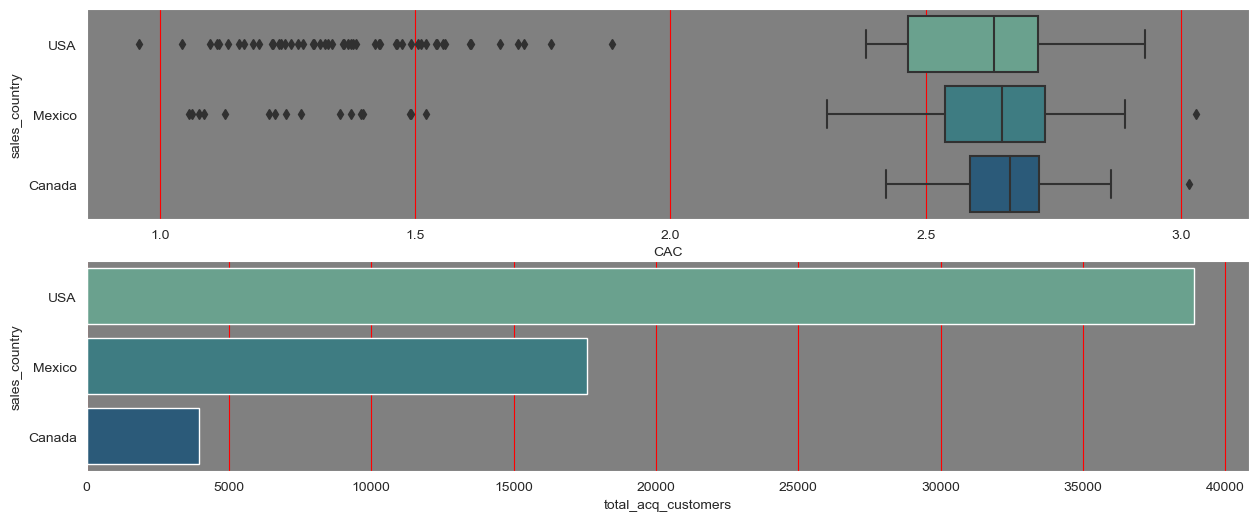

In [120]:
# Box plot for CAC w.r.t. Sales Country
# Bar plot for total customers acquired w.r.t. Sales Country

plt.figure(figsize=(15,6))
plt.subplot(2,1,1,facecolor='grey')
sns.boxplot(data=strlvl_promo_info,
            y='sales_country',
            x='CAC',
            palette='crest')

plt.subplot(2,1,2,facecolor='grey')
pd_df = strlvl_promo_info.groupby(
                ['sales_country']
                ).agg(
                 total_acq_customers = pd.NamedAgg('total_acq_customers', 'sum')
                ).reset_index().sort_values('sales_country', ascending=False)

sns.barplot(data=pd_df,
            y='sales_country',
            x='total_acq_customers',
            palette='crest')
plt.show()

#### Plot spread of CAC and countplot of total customers acquired w.r.t to below store parameters

- Coffee bar - yes/no
- Video Store - yes/no
- Salad bar - yes/no
- Prepared Food - yes/no
- Florist - yes/no

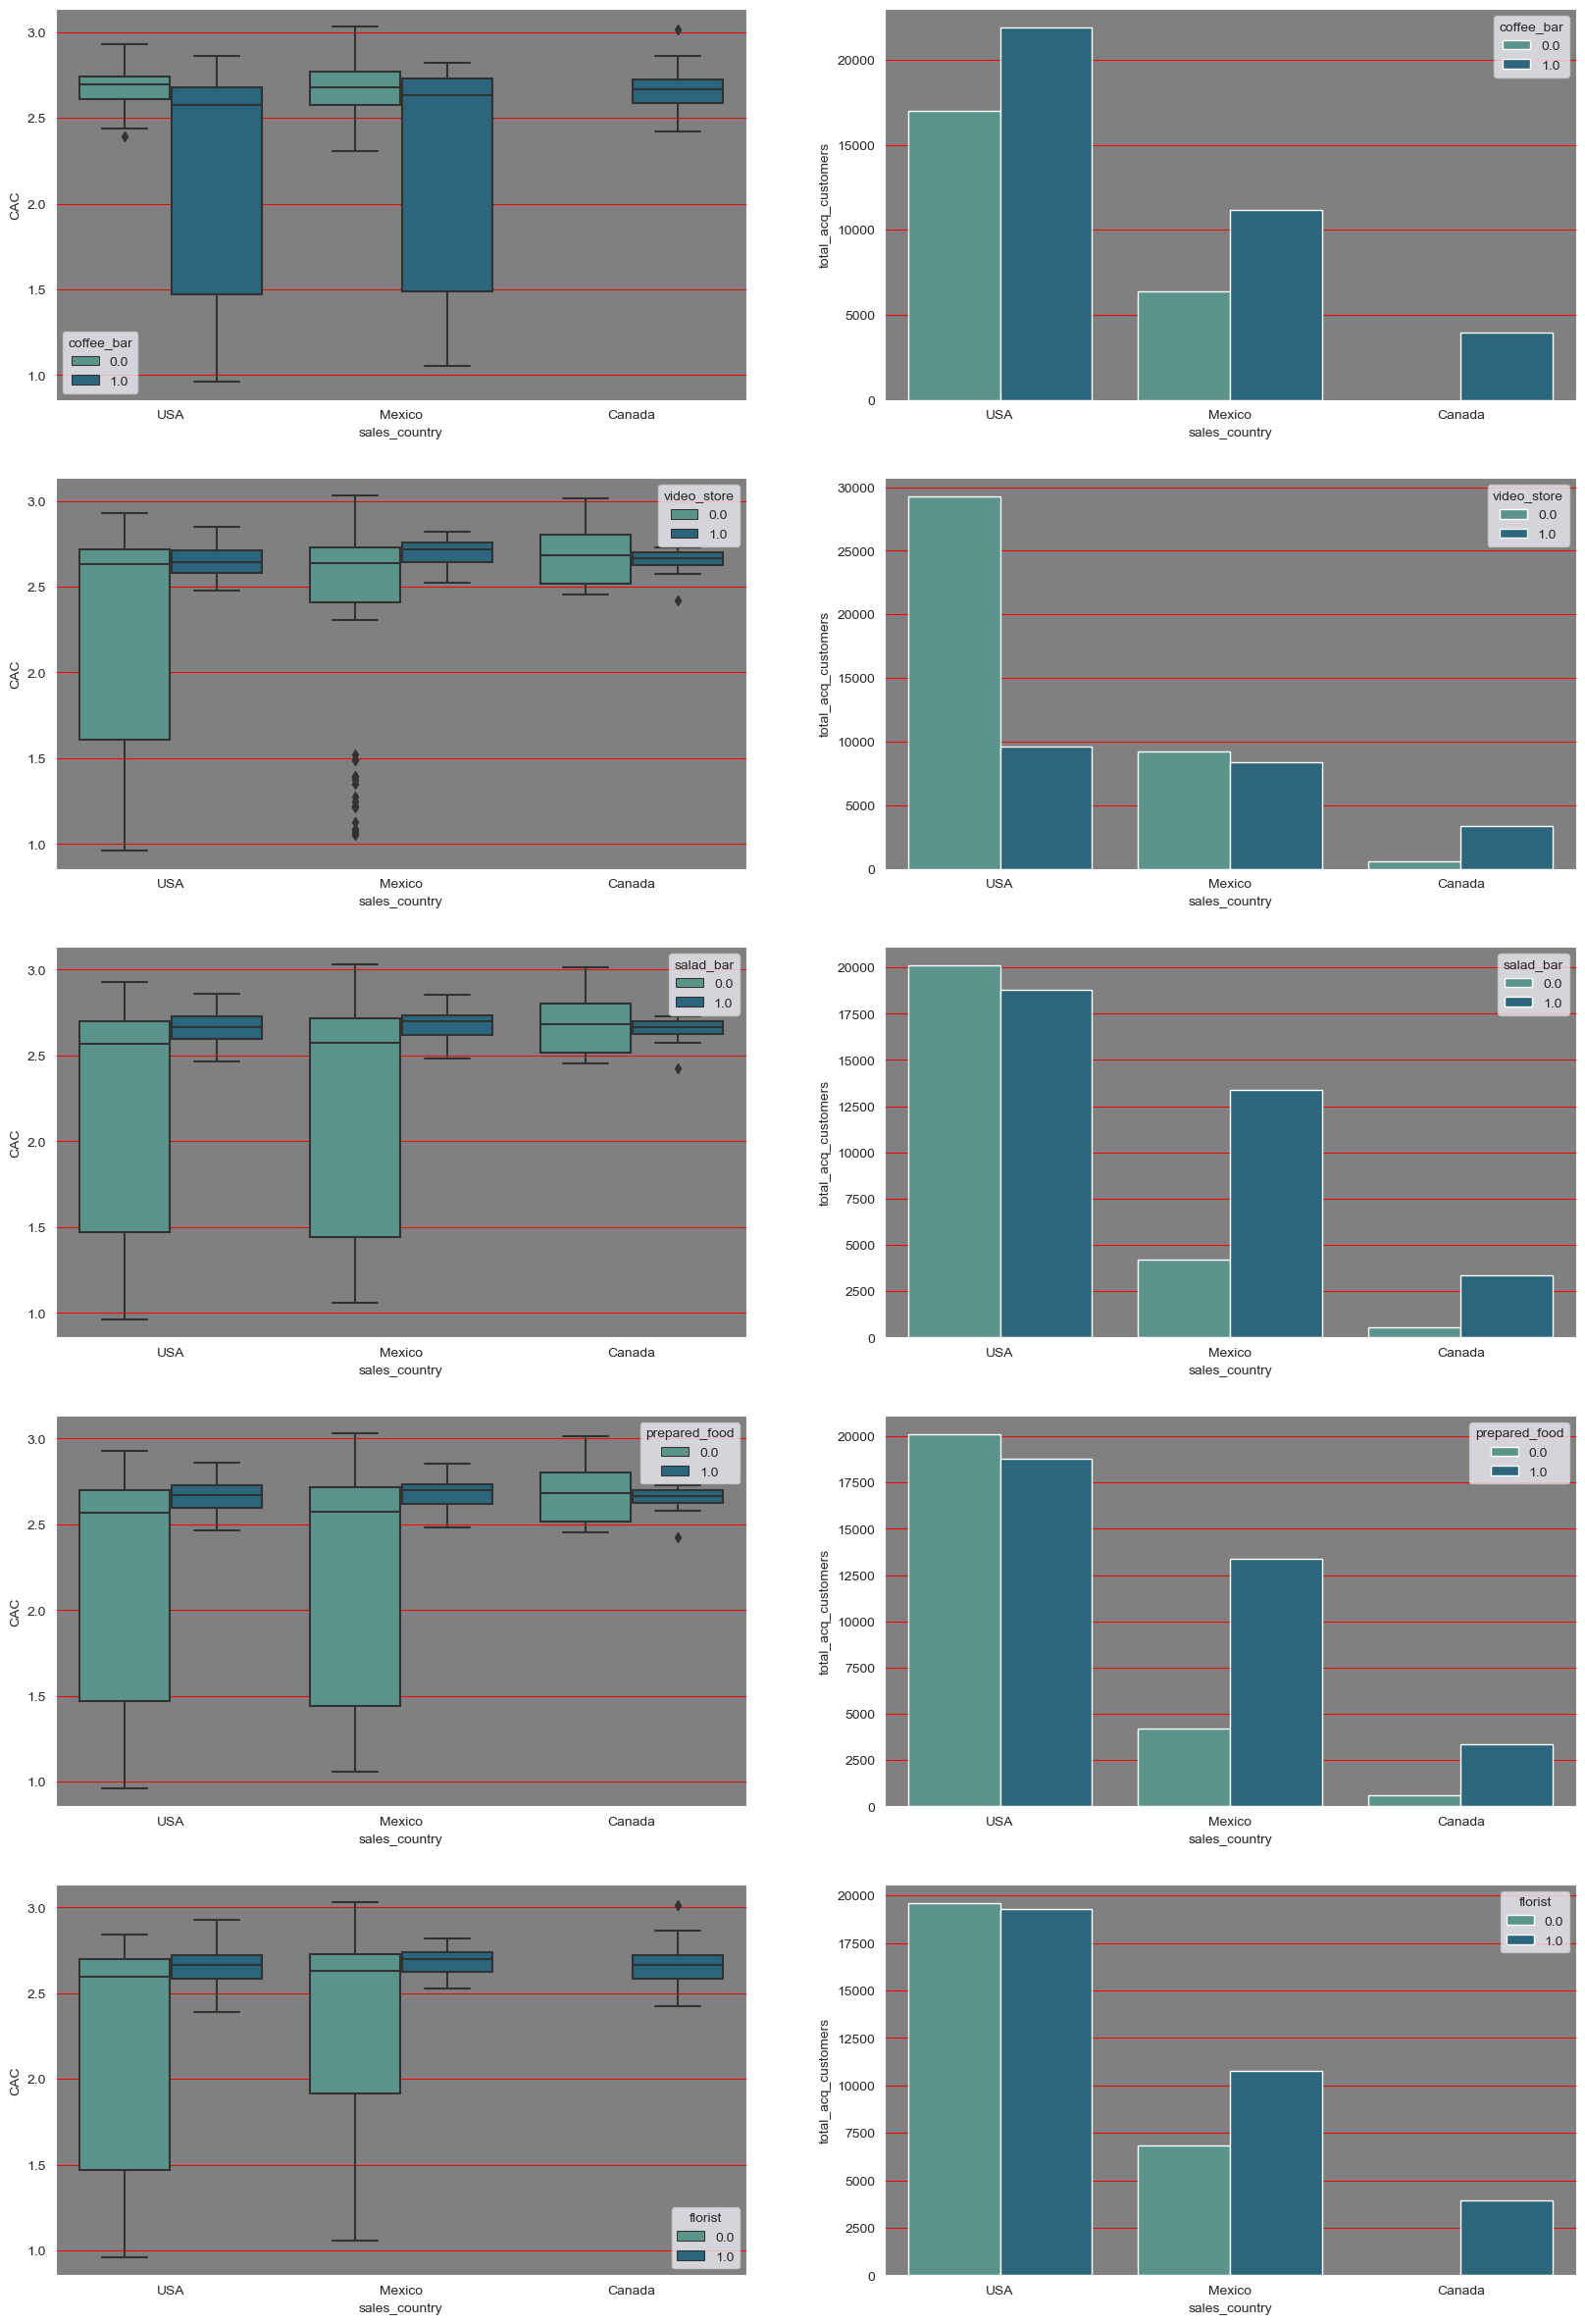

In [121]:
# Plot spread of CAC and countplot of total customers acquired w.r.t below store parameters
# Coffee bar
# Video Store
# Salad Bar
# Prepared Food
# Florist

plt.figure(figsize=(20,30))
plt.subplot(5,2,1, facecolor='grey')
sns.boxplot(data=strlvl_promo_info,
             y='CAC',
             x='sales_country',
             hue='coffee_bar',
             palette='crest')
pd_df = strlvl_promo_info.groupby(
             ['sales_country',
              'coffee_bar']
            ).agg(total_acq_customers = pd.NamedAgg(
                                        'total_acq_customers', 'sum')
                                        ).reset_index().sort_values('sales_country',ascending=False)
plt.subplot(5,2,2, facecolor='grey')
sns.barplot(data=pd_df,
            x='sales_country',
            y='total_acq_customers',
            hue='coffee_bar',
            palette='crest')

plt.subplot(5,2,3, facecolor='grey')
sns.boxplot(data=strlvl_promo_info,
             x='sales_country',
             y='CAC',
             hue='video_store',
             palette='crest')
pd_df = strlvl_promo_info.groupby(
             ['sales_country',
              'video_store']
            ).agg(total_acq_customers = pd.NamedAgg(
                                        'total_acq_customers', 'sum')
                                        ).reset_index().sort_values('sales_country',ascending=False)

plt.subplot(5,2,4, facecolor='grey')
sns.barplot(data=pd_df,
            x='sales_country',
            y='total_acq_customers',
            hue='video_store',
            palette='crest')

plt.subplot(5,2,5, facecolor='grey')
sns.boxplot(data=strlvl_promo_info,
             y='CAC',
             x='sales_country',
             hue='salad_bar',
             palette='crest')

pd_df = strlvl_promo_info.groupby(
             ['sales_country',
              'salad_bar']
            ).agg(total_acq_customers = pd.NamedAgg(
                                        'total_acq_customers', 'sum')
                                        ).reset_index().sort_values('sales_country',ascending=False)

plt.subplot(5,2,6, facecolor='grey')
sns.barplot(data=pd_df,
            x='sales_country',
            y='total_acq_customers',
            hue='salad_bar',
            palette='crest')


plt.subplot(5,2,7, facecolor='grey')
sns.boxplot(data=strlvl_promo_info,
             y='CAC',
             x='sales_country',
             hue='prepared_food',
             palette='crest')

pd_df = strlvl_promo_info.groupby(
             ['sales_country',
              'prepared_food']
            ).agg(total_acq_customers = pd.NamedAgg(
                                        'total_acq_customers', 'sum')
                                        ).reset_index().sort_values('sales_country',ascending=False)

plt.subplot(5,2,8, facecolor='grey')
sns.barplot(data=pd_df,
            x='sales_country',
            y='total_acq_customers',
            hue='prepared_food',
            palette='crest')


plt.subplot(5,2,9, facecolor='grey')
sns.boxplot(data=strlvl_promo_info,
             y='CAC',
             x='sales_country',
             hue='florist',
             palette='crest')

pd_df = strlvl_promo_info.groupby(
             ['sales_country',
              'florist']
            ).agg(total_acq_customers = pd.NamedAgg(
                                        'total_acq_customers', 'sum')
                                        ).reset_index().sort_values('sales_country',ascending=False)

plt.subplot(5,2,10, facecolor='grey')
sns.barplot(data=pd_df,
            x='sales_country',
            y='total_acq_customers',
            hue='florist',
            palette='crest')

plt.show()

#### Plot spread of CAC and countplot of total customers acquired w.r.t store state

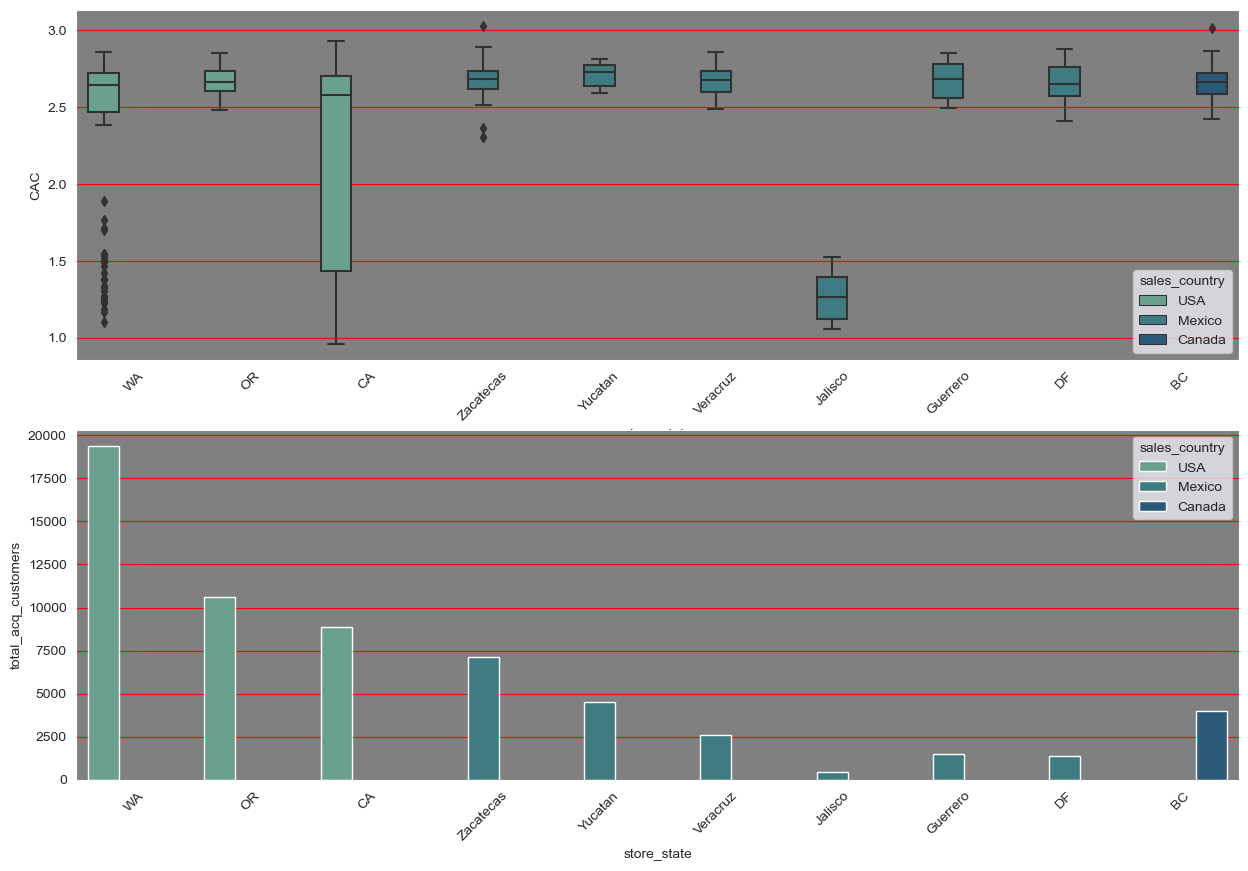

In [122]:
# Plot spread of CAC and countplot of total customers acquired w.r.t store state

plt.figure(figsize=(15,10))

plt.subplot(2,1,1, facecolor='grey')
sns.boxplot(data=strlvl_promo_info,
            x='store_state',
            y='CAC',
            hue='sales_country',
            palette='crest')
plt.xticks(rotation='45')

plt.subplot(2,1,2, facecolor='grey')
pd_df = strlvl_promo_info.groupby(
            ['sales_country',
             'store_state']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers', 'sum')
        ).reset_index().sort_values(
                        ['sales_country',
                         'store_state'], 
                         ascending=[False,False])

sns.barplot(data=pd_df,
            x='store_state',
            y='total_acq_customers',
            hue='sales_country',
            palette='crest',
            ci=None)
plt.xticks(rotation='45')
plt.show()

#### Plot spread of CAC and countplot of total customers acquired w.r.t store type

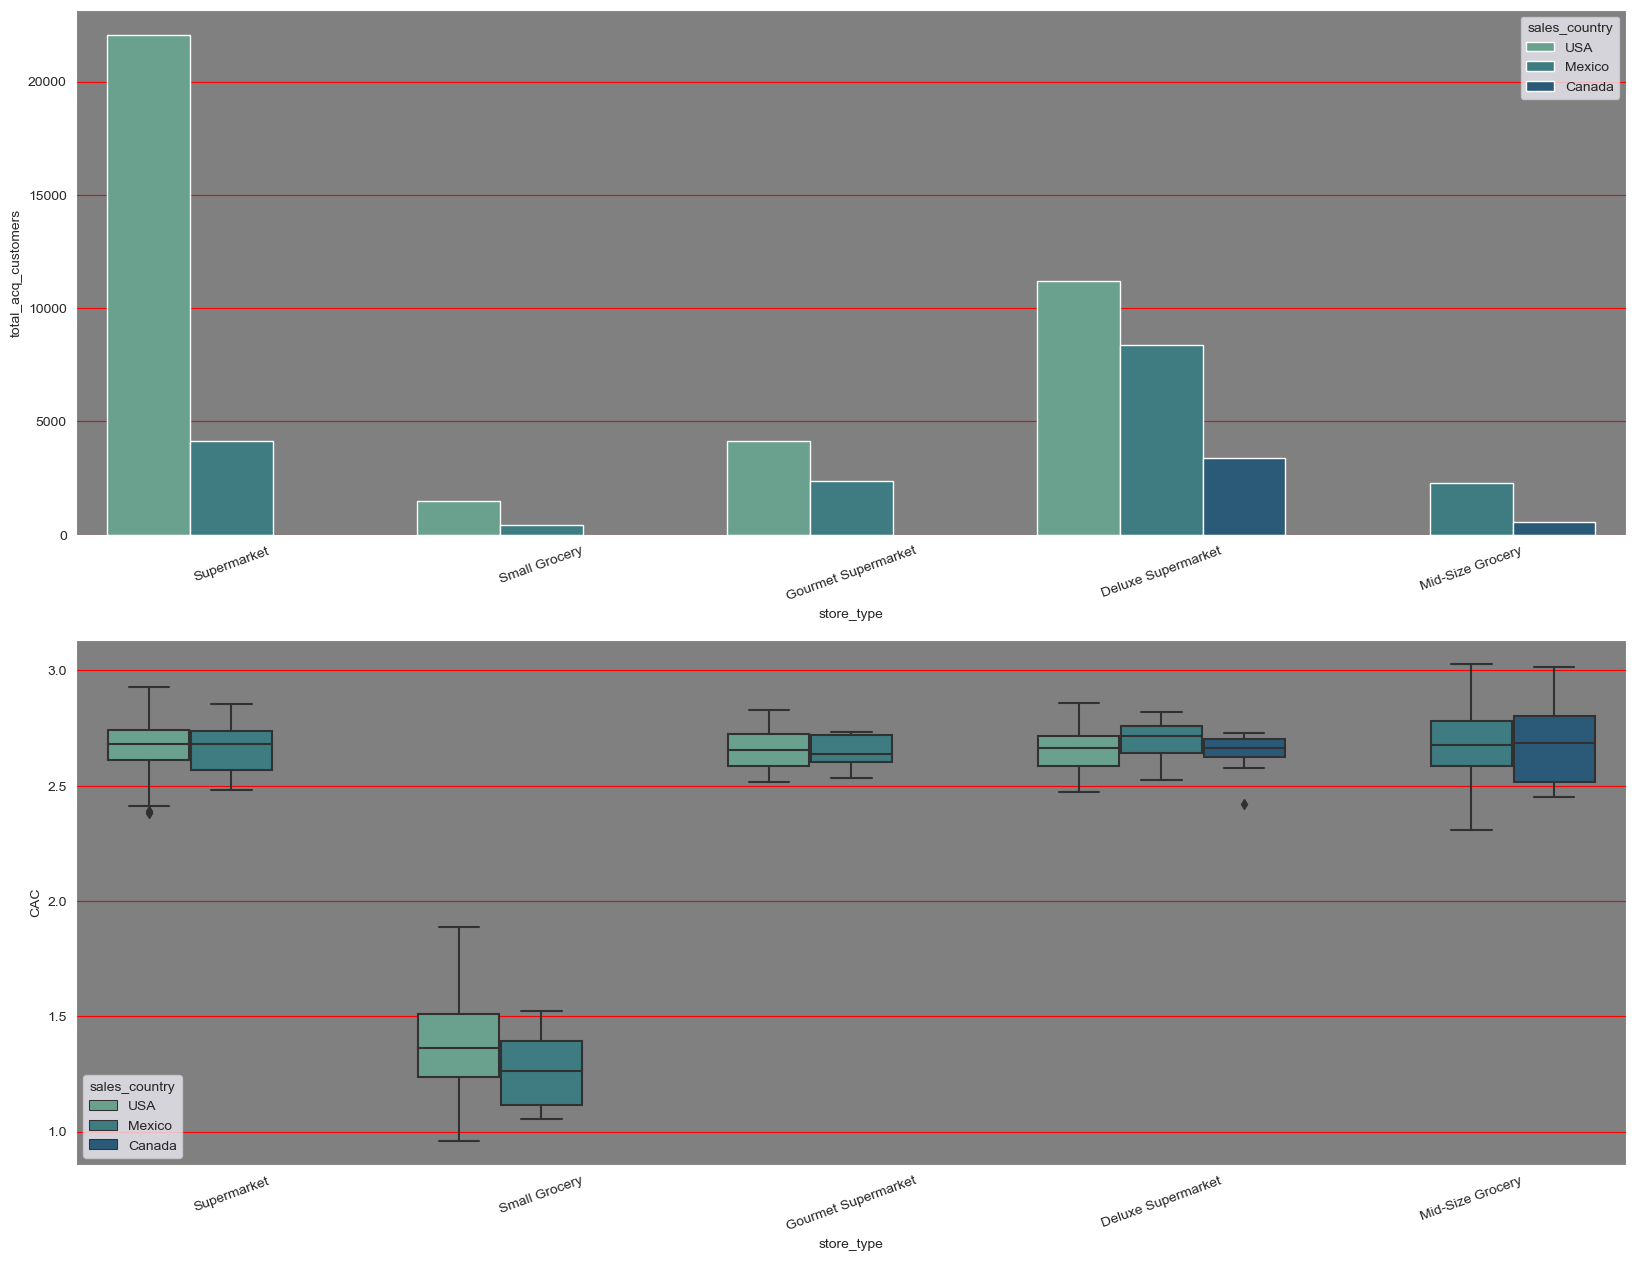

In [123]:
# Plot spread of CAC and countplot of total customers w.r.t store type

plt.figure(figsize=(20,15))

plt.subplot(2,1,1, facecolor='grey')

pd_df = strlvl_promo_info.groupby(
                ['sales_country','store_type']
            ).agg(
                total_acq_customers = pd.NamedAgg('total_acq_customers', 'sum')
            ).reset_index().sort_values(
                                ['sales_country',
                                 'store_type'],
                                 ascending=[False, False]
                            )

sns.barplot(data=pd_df,
            x='store_type',
            y='total_acq_customers',
            hue='sales_country',
            palette='crest',
            ci=None)
plt.xticks(rotation='20')

plt.subplot(2,1,2, facecolor='grey')
sns.boxplot(data=strlvl_promo_info,
            x='store_type',
            y='CAC',
            hue='sales_country',
            order=['Supermarket',
                       'Small Grocery',
                       'Gourmet Supermarket',
                       'Deluxe Supermarket',
                       'Mid-Size Grocery'],
            palette='crest')
plt.xticks(rotation='20')

plt.show()

#### Plot spread of CAC and pie chart of total customers acquired w.r.t promotion campaign

In [208]:
# Plot spread of CAC and pie chart of total customers acquired w.r.t promotion campaign

pd_df = strlvl_promo_info.groupby(
            ['promotion_name']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

division_rat = px.pie(pd_df,
                      names='promotion_name',
                      values='total_acq_customers',
                      hole=0.5,
                      title='Customers acquired per promo',
                      color_discrete_sequence=px.colors.qualitative.Prism)
division_rat.update_traces(textfont=dict(color='#fff'))
division_rat.update_layout(autosize=True,
                           height=800,
                           width=930,
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                           font=dict(color='#8a8d93'),
                           legend=dict(orientation="h", yanchor="bottom", y=0.1, xanchor="right", x=1.9)
                           )
division_rat.show()

##------------------------------------------

pd_df = strlvl_promo_info.groupby(
            ['promotion_name']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

#x = pd_df['promotion_name'].to_list()
fig = px.box(strlvl_promo_info,
             y='CAC',
             x='promotion_name',
             color_discrete_sequence=px.colors.qualitative.Safe
            )

fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(autosize=True,
                           height=600,
                           width=930,
                           margin=dict(t=30, b=20, l=20, r=20),
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           font=dict(color='#8a8d93')
                           )
fig.update_xaxes(categoryorder='array', categoryarray= pd_df.promotion_name)

fig.show()

#### Plot spread of CAC and pie chart of total customers acquired w.r.t media type used for ad campaign

In [125]:
# Plot spread of CAC and pie chart of total customers acquired w.r.t media type used for ad campaign

pd_df = strlvl_promo_info.groupby(
            ['media_type'
            ]
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

division_rat = px.pie(pd_df,
                      names='media_type',
                      values='total_acq_customers',
                      hole=0.5,
                      title='Customers acquired per media type',
                      color_discrete_sequence=px.colors.qualitative.Prism)
division_rat.update_traces(textfont=dict(color='#fff'))
division_rat.update_layout(autosize=True,
                           height=600,
                           width=930,
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                           font=dict(color='#8a8d93'),
                           legend=dict(orientation="h", yanchor="bottom", y=0.4, xanchor="right", x=1.8)
                           )
division_rat.show()

##--------------------------------------------

pd_df = strlvl_promo_info.groupby(
            ['media_type']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

#x = pd_df['promotion_name'].to_list()
fig = px.box(strlvl_promo_info,
             y='CAC',
             x='media_type',
             color_discrete_sequence=px.colors.qualitative.Safe
            )

fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(autosize=True,
                           height=600,
                           width=930,
                           margin=dict(t=30, b=20, l=20, r=20),
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           font=dict(color='#8a8d93')
                           )
fig.update_xaxes(categoryorder='array', categoryarray= pd_df.media_type)

fig.show()

#### Plot scatterplot of CAC w.r.t below aggregated parameters based on store level grouping

- total acq customers
- total units sold
- total store sales
- total store cost
- total acq cost

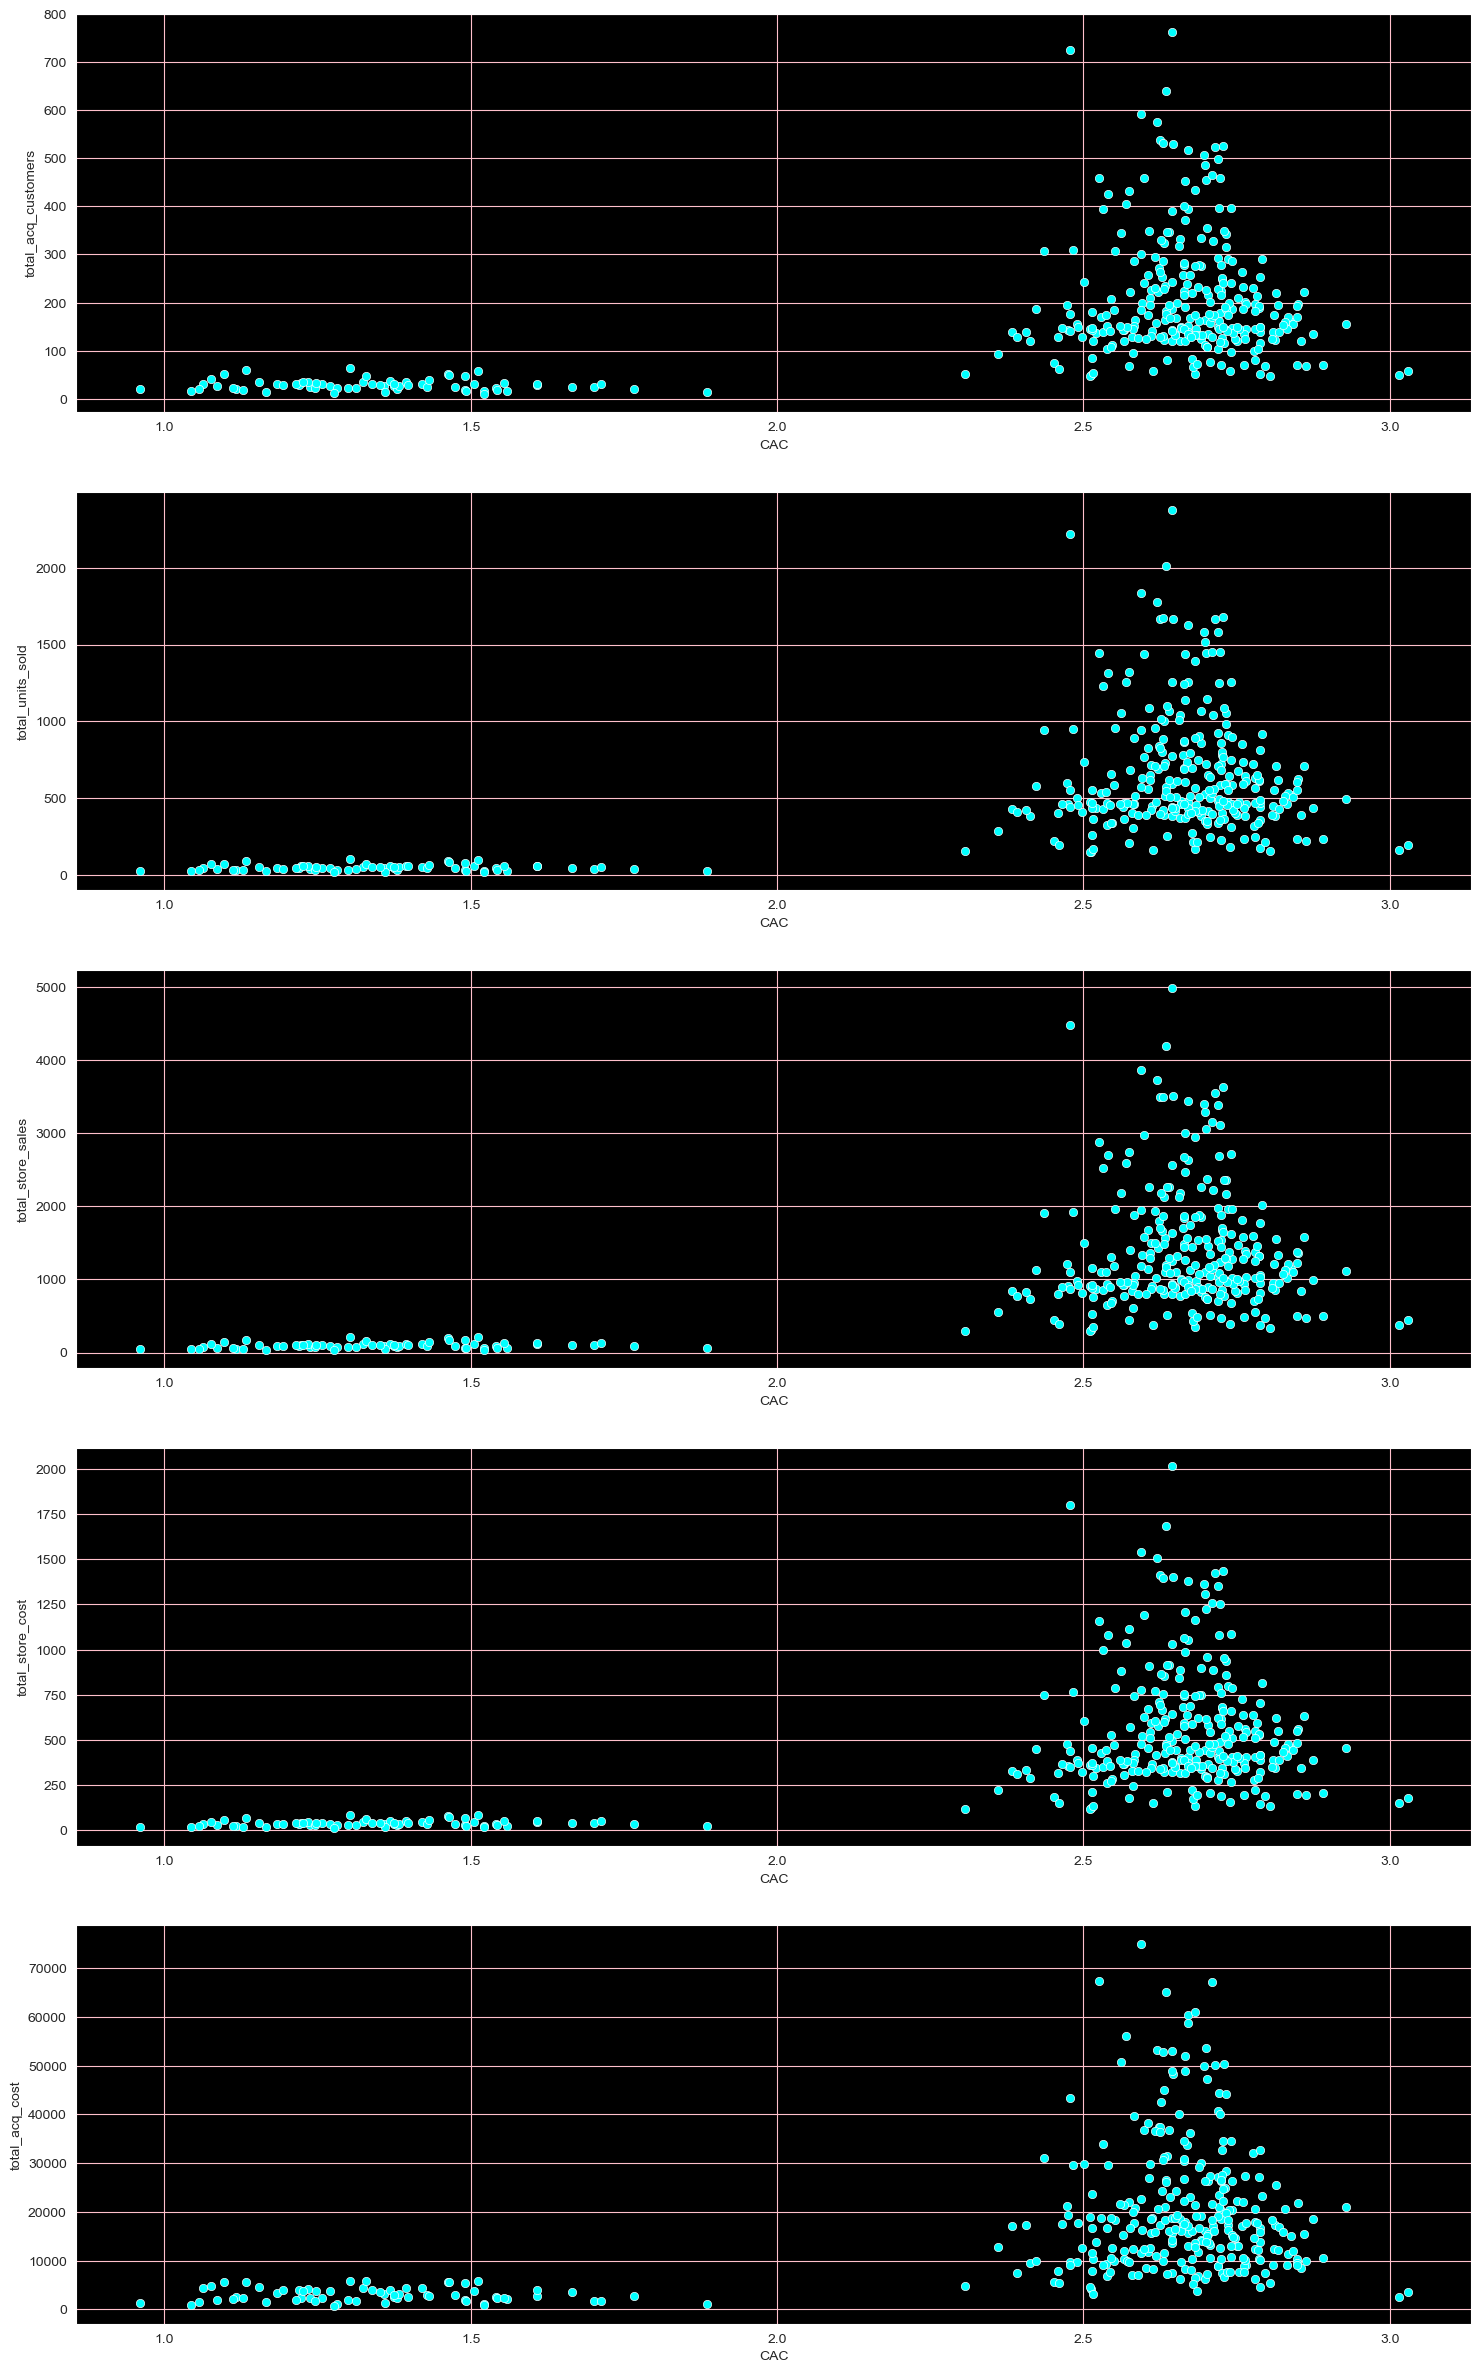

In [126]:
# Plot scatterplot of CAC w.r.t. below aggregated parameters based on store level grouping
# total acq customers
# total units sold
# total store sales
# total store cost
# total acq cost

plt.figure(figsize=(18,30))
plt.subplot(5,1,1,facecolor='black')
sns.scatterplot(data=strlvl_promo_info,
                y='total_acq_customers',
                x='CAC',
                color='cyan',
                marker='o')
plt.grid(linestyle='-', color='pink')

plt.subplot(5,1,2,facecolor='black')
sns.scatterplot(data=strlvl_promo_info,
                y='total_units_sold',
                x='CAC',
                color='cyan',
                marker='o')
plt.grid(linestyle='-', color='pink')

plt.subplot(5,1,3,facecolor='black')
sns.scatterplot(data=strlvl_promo_info,
                y='total_store_sales',
                x='CAC',
                color='cyan',
                marker='o')
plt.grid(linestyle='-', color='pink')

plt.subplot(5,1,4,facecolor='black')
sns.scatterplot(data=strlvl_promo_info,
                y='total_store_cost',
                x='CAC',
                color='cyan',
                marker='o')
plt.grid(linestyle='-', color='pink')

plt.subplot(5,1,5,facecolor='black')
sns.scatterplot(data=strlvl_promo_info,
                y='total_acq_cost',
                x='CAC',
                color='cyan',
                marker='o')
plt.grid(linestyle='-', color='pink')

plt.show()

#### Plot correlation plot/heat map of numerical features

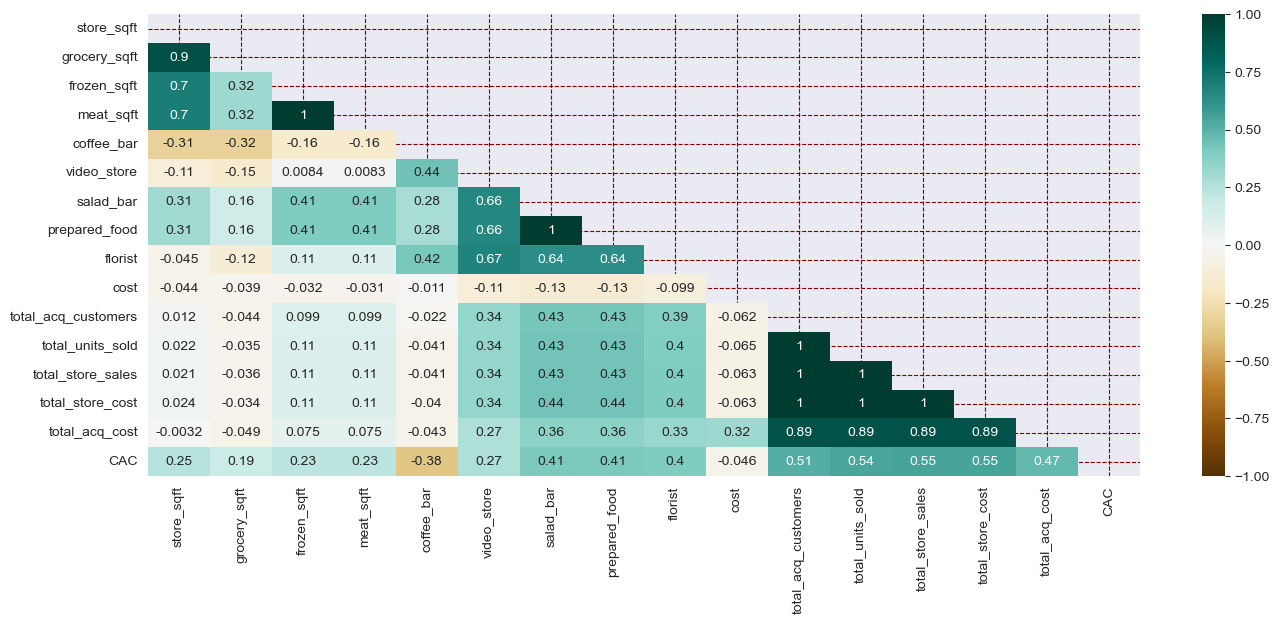

In [127]:
# Plot correlation plot of numerical features aggregated based on store level grouping

pd_df = strlvl_promo_info.corr()

plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(pd_df, dtype=np.bool_))
heatmap = sns.heatmap(pd_df, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.grid(linestyle='--', color='maroon')
plt.show()

#### Food Category Level Aggregation of customers and CAC

In [128]:
#Food Level

#### Aggregate below features based on food category level details

- total acq customers
- total units sold
- total store sales
- total store cost
- total acq cost

In [129]:
# Aggregate below features based on food category level details
# total acq customers
# total units sold
# total store sales
# total store cost
# total acq cost

# Calculate CAC = (store cost + marketing cost)/(total customers acq)

foodlvl_promo_info = df.groupby(['sales_country',
                    'food_family',
                    'food_department',
                    'food_category', 
                    'promotion_name',
                    'media_type',
                    'cost']).agg(
                        total_acq_customers = pd.NamedAgg('gender', 'count'),
                        total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                        total_store_sales = pd.NamedAgg('store_sales','sum'),
                        total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                        total_acq_cost = pd.NamedAgg('cost', 'sum')
                    ).reset_index().sort_values(
                                    ['sales_country',
                                    'food_family',
                                    'food_department',
                                    'food_category',
                                    'promotion_name',
                                    'media_type'],ascending=False
                                    )

foodlvl_promo_info['CAC'] = ( foodlvl_promo_info['total_store_cost'] + \
                             foodlvl_promo_info['total_acq_cost']/1000000 \
                           ) / foodlvl_promo_info['total_acq_customers']

In [130]:
# Get the glimpse of aggregated dataframe

foodlvl_promo_info.head()

sales_country     food_family food_department food_category    promotion_name               media_type    cost  total_acq_customers  total_units_sold  total_store_sales  total_store_cost  total_acq_cost       CAC
12946           USA  Non-Consumable     Periodicals     Magazines     You Save Days                       TV  108.22                    1               3.0               6.45            2.8380          108.22  2.838108
12945           USA  Non-Consumable     Periodicals     Magazines     You Save Days             Sunday Paper   51.27                    4               9.0              21.44            8.6850          205.08  2.171301
12944           USA  Non-Consumable     Periodicals     Magazines     You Save Days          In-Store Coupon   95.25                    3               5.0               5.68            2.3528          285.75  0.784362
12943           USA  Non-Consumable     Periodicals     Magazines     You Save Days                Bulk Mail  131.81                   10              30.0              50.88           19.8817         1318.10  1.988302
12942           USA  Non-Consumable     Periodicals     Magazines  Weekend Markdown  Sunday Paper, Radio, TV   67.51                    1               1.0               2.85            0.9975           67.51  0.997568

#### Plot spread of CAC and pie chart of total customers acquired w.r.t food family

In [131]:
# Plot spread of CAC and pie chart of total customers acquired w.r.t food family

pd_df = foodlvl_promo_info.groupby(
            ['food_family'
            ]
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

division_rat = px.pie(pd_df,
                      names='food_family',
                      values='total_acq_customers',
                      hole=0.4,
                      title='Customers acquired per food family',
                      color_discrete_sequence=px.colors.qualitative.T10)
division_rat.update_traces(textfont=dict(color='#fff'))
division_rat.update_layout(autosize=True,
                           height=400,
                           width=930,
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                           font=dict(color='#8a8d93'),
                           legend=dict(orientation="v", yanchor="bottom", y=0.5, xanchor="right", x=1.5)
                           )
division_rat.show()

##------------------------------------------

pd_df = foodlvl_promo_info.groupby(
            ['food_family']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

fig = px.box(foodlvl_promo_info,
             x='CAC',
             y='food_family',
             color_discrete_sequence=px.colors.qualitative.Safe
            )

fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(autosize=True,
                           height=300,
                           width=930,
                           margin=dict(t=30, b=20, l=20, r=20),
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           font=dict(color='#8a8d93')
                           )
fig.update_xaxes(categoryorder='array', categoryarray= pd_df.food_family)

fig.show()

#### Plot sprerad of CAC and pie chart of total customers acquired w.r.t food department

In [132]:
# Plot spread of CAC and pie chart of total customers acquired w.r.t food department

pd_df = foodlvl_promo_info.groupby(
            ['food_department'
            ]
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

division_rat = px.pie(pd_df,
                      names='food_department',
                      values='total_acq_customers',
                      hole=0.4,
                      title='Customers acquired per food department',
                      color_discrete_sequence=px.colors.qualitative.Prism)
division_rat.update_traces(textfont=dict(color='#fff'))
division_rat.update_layout(autosize=True,
                           height=400,
                           width=930,
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                           font=dict(color='#8a8d93'),
                           legend=dict(orientation="h", yanchor="bottom", y=0.2, xanchor="right", x=2.5)
                           )
division_rat.show()

##------------------------------------------

pd_df = foodlvl_promo_info.groupby(
            ['food_department']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

fig = px.box(foodlvl_promo_info,
             y='CAC',
             x='food_department',
             color_discrete_sequence=px.colors.qualitative.Safe
            )

fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(autosize=True,
                           height=400,
                           width=930,
                           margin=dict(t=30, b=20, l=20, r=20),
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           font=dict(color='#8a8d93')
                           )
fig.update_xaxes(categoryorder='array', categoryarray= pd_df.food_department)

fig.show()

#### Plot spread of CAC and pie chart of total customers acquired w.r.t food category

In [133]:
# Plot spread of CAC and pie chart of total customers w.r.t food category

pd_df = foodlvl_promo_info.groupby(
            ['food_category'
            ]
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

division_rat = px.pie(pd_df,
                      names='food_category',
                      values='total_acq_customers',
                      hole=0.4,
                      title='Customers acquired per food category',
                      color_discrete_sequence=px.colors.qualitative.Prism)
division_rat.update_traces(textfont=dict(color='#fff'))
division_rat.update_layout(autosize=True,
                           height=700,
                           width=930,
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                           font=dict(color='#8a8d93'),
                           legend=dict(orientation="h", yanchor="bottom", y=0.2, xanchor="right", x=1.9)
                           )
division_rat.show()

##------------------------------------------

pd_df = foodlvl_promo_info.groupby(
            ['food_category']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

fig = px.box(foodlvl_promo_info,
             y='CAC',
             x='food_category',
             color_discrete_sequence=px.colors.qualitative.Safe
            )

fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(autosize=True,
                           height=500,
                           width=930,
                           margin=dict(t=30, b=20, l=20, r=20),
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           font=dict(color='#8a8d93')
                           )
fig.update_xaxes(categoryorder='array', categoryarray= pd_df.food_category)

fig.show()

#### Customer Level Aggregation and CAC of below parameters

- total customers acq
- total units sold
- total store sales
- total store cost
- total acq cost 

In [134]:
#Customer Level

In [135]:
# Aggregate below parameters based of customer level details
# total cust acq
# total units sold
# total store sales
# total store cost
# total acq cost

# Calcualte CAC = (store cost + marketing cost)/(total customers acq)

genderlvl_promo_info = df.groupby(['gender',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['gender',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

genderlvl_promo_info['CAC'] = ( genderlvl_promo_info['total_store_cost'] + \
                             genderlvl_promo_info['total_acq_cost']/1000000 \
                           ) / genderlvl_promo_info['total_acq_customers']

In [136]:
# Get the glimpse of aggregated dataframe

genderlvl_promo_info.head()

gender promotion_name          media_type    cost  total_acq_customers  total_units_sold  total_store_sales  total_store_cost  total_acq_cost       CAC
0      F   Bag Stuffers         Daily Paper   70.32                  135             421.0             954.93          379.9735         9493.20  2.814689
1      F   Bag Stuffers  Daily Paper, Radio  117.93                    6              14.0              23.18            8.6238          707.58  1.437418
2      F   Bag Stuffers  Daily Paper, Radio  126.62                  273             852.0            1776.63          707.6857        34567.26  2.592382
3      F   Bag Stuffers  Product Attachment   82.62                   92             288.0             639.80          256.4033         7601.04  2.787075
4      F   Bag Stuffers      Street Handout  123.79                   27              45.0              94.33           39.3389         3342.33  1.457120

#### Plot spread of CAC and pie chart of total customers acquired w.r.t gender

In [137]:
# Plot spread of CAC and pie chart of total customers acquired w.r.t gender

pd_df = genderlvl_promo_info.groupby(
            ['gender'
            ]
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

division_rat = px.pie(pd_df,
                      names='gender',
                      values='total_acq_customers',
                      hole=0.4,
                      title='Customers acquired per gender',
                      color_discrete_sequence=px.colors.qualitative.T10)
division_rat.update_traces(textfont=dict(color='#fff'))
division_rat.update_layout(autosize=True,
                           height=400,
                           width=930,
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                           font=dict(color='#8a8d93'),
                           legend=dict(orientation="h", yanchor="bottom", y=0.5, xanchor="right", x=1.5)
                           )
division_rat.show()

##------------------------------------------

pd_df = genderlvl_promo_info.groupby(
            ['gender']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

fig = px.box(genderlvl_promo_info,
             x='CAC',
             y='gender',
             color_discrete_sequence=px.colors.qualitative.Safe
            )

fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(autosize=True,
                           height=200,
                           width=930,
                           margin=dict(t=30, b=20, l=20, r=20),
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           font=dict(color='#8a8d93')
                           )
fig.update_xaxes(categoryorder='array', categoryarray= pd_df.gender)

fig.show()

#### Aggregate below parameters based on marital status

- total customers acq
- total units sold
- total store sales
- total store cost
- total acq cost

In [138]:
# Aggregate below parameters based on marital status
# total customers acq
# total units sold
# total store sales
# total store cost
# total acq cost

# Calculate CAC = (store cost + marketing cost)/(total customers acq)

maritallvl_promo_info = df.groupby(['marital_status',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['marital_status',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

maritallvl_promo_info['CAC'] = ( maritallvl_promo_info['total_store_cost'] + \
                             maritallvl_promo_info['total_acq_cost']/1000000 \
                           ) / maritallvl_promo_info['total_acq_customers']

In [139]:
# Get glimpse of aggregated dataframe

maritallvl_promo_info.head()

marital_status promotion_name          media_type    cost  total_acq_customers  total_units_sold  total_store_sales  total_store_cost  total_acq_cost       CAC
0              M   Bag Stuffers         Daily Paper   70.32                  100             310.0             706.81          284.6242         7032.00  2.846312
1              M   Bag Stuffers  Daily Paper, Radio  117.93                    8              17.0              26.41           10.0231          943.44  1.253005
2              M   Bag Stuffers  Daily Paper, Radio  126.62                  269             831.0            1741.66          698.8640        34060.78  2.598134
3              M   Bag Stuffers  Product Attachment   82.62                   86             264.0             554.34          219.6478         7105.32  2.554127
4              M   Bag Stuffers      Street Handout  123.79                    3               6.0               8.54            3.6110          371.37  1.203790

#### Plot spread of CAC and pie chart of total customers acquired w.r.t marital status

In [140]:
# Plot spread of CAC and pie chart of total customers acquired w.r.t marital status

pd_df = maritallvl_promo_info.groupby(
            ['marital_status'
            ]
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

division_rat = px.pie(pd_df,
                      names='marital_status',
                      values='total_acq_customers',
                      hole=0.4,
                      title='Customers acquired per marital status',
                      color_discrete_sequence=px.colors.qualitative.T10)
division_rat.update_traces(textfont=dict(color='#fff'))
division_rat.update_layout(autosize=True,
                           height=400,
                           width=930,
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                           font=dict(color='#8a8d93'),
                           legend=dict(orientation="h", yanchor="bottom", y=0.5, xanchor="right", x=1.5)
                           )
division_rat.show()

##------------------------------------------

pd_df = maritallvl_promo_info.groupby(
            ['marital_status']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

fig = px.box(maritallvl_promo_info,
             x='CAC',
             y='marital_status',
             color_discrete_sequence=px.colors.qualitative.Safe
            )

fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(autosize=True,
                           height=200,
                           width=930,
                           margin=dict(t=30, b=20, l=20, r=20),
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           font=dict(color='#8a8d93')
                           )
fig.update_xaxes(categoryorder='array', categoryarray= pd_df.marital_status)

fig.show()

#### Aggregate below parameters w.r.t total children

- total acq customers
- total units sold
- total store sales
- total store cost
- total acq cost

In [141]:
# Aggregate below parameters w.r.t total children
# total acq customers
# total units sold
# total store sales
# total store cost
# total acq cost

# Calculate CAC = (store cost + marketing cost)/(total customers acq)

totalchildrenlvl_promo_info = df.groupby(['total_children',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['total_children',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

totalchildrenlvl_promo_info['CAC'] = ( totalchildrenlvl_promo_info['total_store_cost'] + \
                             totalchildrenlvl_promo_info['total_acq_cost']/1000000 \
                           ) / totalchildrenlvl_promo_info['total_acq_customers']

In [142]:
# Get glimpse of aggregated dataframe

totalchildrenlvl_promo_info.head()

total_children promotion_name          media_type    cost  total_acq_customers  total_units_sold  total_store_sales  total_store_cost  total_acq_cost       CAC
0             0.0   Bag Stuffers         Daily Paper   70.32                    9              29.0              64.61           26.0134          632.88  2.890448
1             0.0   Bag Stuffers  Daily Paper, Radio  117.93                    3               6.0              10.66            3.5652          353.79  1.188518
2             0.0   Bag Stuffers  Daily Paper, Radio  126.62                   66             200.0             433.72          169.4428         8356.92  2.567442
3             0.0   Bag Stuffers  Product Attachment   82.62                   23              70.0             146.23           60.0912         1900.26  2.612743
4             0.0   Bag Stuffers      Street Handout  123.79                    3               6.0               8.54            3.6110          371.37  1.203790

#### Plot spread of CAC and pie chart of total customers acquired w.r.t total children

In [143]:
# Plot spread of CAC and pie chart of total customers acquired w.r.t total children

pd_df = totalchildrenlvl_promo_info.groupby(
            ['total_children'
            ]
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

division_rat = px.pie(pd_df,
                      names='total_children',
                      values='total_acq_customers',
                      hole=0.4,
                      title='Customers acquired per total children',
                      color_discrete_sequence=px.colors.qualitative.T10)
division_rat.update_traces(textfont=dict(color='#fff'))
division_rat.update_layout(autosize=True,
                           height=400,
                           width=930,
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                           font=dict(color='#8a8d93'),
                           legend=dict(orientation="h", yanchor="bottom", y=0.5, xanchor="right", x=1.5)
                           )
division_rat.show()

##------------------------------------------

pd_df = totalchildrenlvl_promo_info.groupby(
            ['total_children']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

fig = px.box(totalchildrenlvl_promo_info,
             y='CAC',
             x='total_children',
             color_discrete_sequence=px.colors.qualitative.Safe
            )

fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(autosize=True,
                           height=400,
                           width=930,
                           margin=dict(t=30, b=20, l=20, r=20),
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           font=dict(color='#8a8d93')
                           )
fig.update_xaxes(categoryorder='array', categoryarray= pd_df.total_children)

fig.show()

#### Aggregate below parameters w.r.t qualification of the customer

- total customers acq
- total units sold
- total store sales
- total store cost
- total acq cost

In [144]:
# Aggregate below parameters w.r.t qualification of the customer
# total customers acq
# total units sold
# total store sales
# total store cost
# total acq cost

# Calculate CAC = (store cost + marketing cost)/(total acq customers)

educationlvl_promo_info = df.groupby(['education',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['education',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

educationlvl_promo_info['CAC'] = ( educationlvl_promo_info['total_store_cost'] + \
                             educationlvl_promo_info['total_acq_cost']/1000000 \
                           ) / educationlvl_promo_info['total_acq_customers']

In [145]:
# Get the glimpse of aggregated dataframe

educationlvl_promo_info.head()

education promotion_name             media_type    cost  total_acq_customers  total_units_sold  total_store_sales  total_store_cost  total_acq_cost       CAC
0  Bachelors Degree   Bag Stuffers            Daily Paper   70.32                   51             168.0             387.82          156.4672         3586.32  3.068055
1  Bachelors Degree   Bag Stuffers     Daily Paper, Radio  117.93                    7              13.0              25.53            9.3139          825.51  1.330675
2  Bachelors Degree   Bag Stuffers     Daily Paper, Radio  126.62                  147             453.0             975.08          393.2195        18613.14  2.675089
3  Bachelors Degree   Bag Stuffers     Product Attachment   82.62                   60             188.0             384.60          154.7507         4957.20  2.579261
4  Bachelors Degree   Best Savings  Cash Register Handout  110.17                   65             201.0             405.68          166.9585         7161.05  2.568702

#### Plot spread of CAC and pie chart of total customers acquired w.r.t customers education

In [146]:
# Plot spread of CAC and pie chart of total customers acquired w.r.t customers education

pd_df = educationlvl_promo_info.groupby(
            ['education'
            ]
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

division_rat = px.pie(pd_df,
                      names='education',
                      values='total_acq_customers',
                      hole=0.4,
                      title='Customers acquired per education',
                      color_discrete_sequence=px.colors.qualitative.T10)
division_rat.update_traces(textfont=dict(color='#fff'))
division_rat.update_layout(autosize=True,
                           height=400,
                           width=930,
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                           font=dict(color='#8a8d93'),
                           legend=dict(orientation="h", yanchor="bottom", y=0.5, xanchor="right", x=2.5)
                           )
division_rat.show()

##------------------------------------------

pd_df = educationlvl_promo_info.groupby(
            ['education']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

fig = px.box(educationlvl_promo_info,
             y='CAC',
             x='education',
             color_discrete_sequence=px.colors.qualitative.Safe
            )

fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(autosize=True,
                           height=400,
                           width=930,
                           margin=dict(t=30, b=20, l=20, r=20),
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           font=dict(color='#8a8d93')
                           )
fig.update_xaxes(categoryorder='array', categoryarray= pd_df.education)

fig.show()

#### Aggregate below parameters w.r.t member card the customer is holding

- total acq customers
- total units sold
- total store sales
- total store cost
- total acq cost

In [147]:
# Aggregate below parameters w.r.t member card the customer is holding
# total acq customers
# total units sold
# total store sales
# total store cost
# total acq cost

# Calculate CAC = (store cost + marketing cost)/(total customers acq)

membercardlvl_promo_info = df.groupby(['member_card',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['member_card',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

membercardlvl_promo_info['CAC'] = ( membercardlvl_promo_info['total_store_cost'] + \
                             membercardlvl_promo_info['total_acq_cost']/1000000 \
                           ) / membercardlvl_promo_info['total_acq_customers']

In [148]:
# Get the glimpse of the aggregated dataframe

membercardlvl_promo_info.head()

member_card promotion_name          media_type    cost  total_acq_customers  total_units_sold  total_store_sales  total_store_cost  total_acq_cost       CAC
0      Bronze   Bag Stuffers         Daily Paper   70.32                  140             448.0             983.70          401.3544         9844.80  2.866887
1      Bronze   Bag Stuffers  Daily Paper, Radio  117.93                    5              10.0              22.30            7.9146          589.65  1.583038
2      Bronze   Bag Stuffers  Daily Paper, Radio  126.62                  275             847.0            1801.77          712.6193        34820.50  2.591470
3      Bronze   Bag Stuffers  Product Attachment   82.62                  124             385.0             784.27          310.7733        10244.88  2.506319
4      Bronze   Bag Stuffers      Street Handout  123.79                   13              21.0              39.63           16.4357         1609.27  1.264408

#### Plot spread of CAC and pie chart of total customers acquired w.r.t member card of the customer

In [149]:
# Plot spread of CAC and pie chart of total customers acquired w.r.t member card of the customer

pd_df = membercardlvl_promo_info.groupby(
            ['member_card'
            ]
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

division_rat = px.pie(pd_df,
                      names='member_card',
                      values='total_acq_customers',
                      hole=0.4,
                      title='Customers acquired per member card',
                      color_discrete_sequence=px.colors.qualitative.T10)
division_rat.update_traces(textfont=dict(color='#fff'))
division_rat.update_layout(autosize=True,
                           height=400,
                           width=930,
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                           font=dict(color='#8a8d93'),
                           legend=dict(orientation="h", yanchor="bottom", y=0.5, xanchor="right", x=1.5)
                           )
division_rat.show()

##------------------------------------------

pd_df = membercardlvl_promo_info.groupby(
            ['member_card']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

fig = px.box(membercardlvl_promo_info,
             y='CAC',
             x='member_card',
             color_discrete_sequence=px.colors.qualitative.Safe
            )

fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(autosize=True,
                           height=400,
                           width=930,
                           margin=dict(t=30, b=20, l=20, r=20),
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           font=dict(color='#8a8d93')
                           )
fig.update_xaxes(categoryorder='array', categoryarray= pd_df.member_card)

fig.show()

#### Aggregate below parameters w.r.t occupation of the customer

- total customers acq
- total units sold
- total store sales
- total store cost
- total acq cost

In [150]:
# Aggregate below parameters w.r.t occupation of the customer
# total customers acq
# total units sold
# total store sales
# total store cost
# total acq cost

# Calculate CAC = (store cost + marketing cost)/(total customer acq)

occupationlvl_promo_info = df.groupby(['occupation',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['occupation',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

occupationlvl_promo_info['CAC'] = ( occupationlvl_promo_info['total_store_cost'] + \
                             occupationlvl_promo_info['total_acq_cost']/1000000 \
                           ) / occupationlvl_promo_info['total_acq_customers']

In [151]:
# Get the glimpse of aggregated dataframe

occupationlvl_promo_info.head()

occupation promotion_name               media_type    cost  total_acq_customers  total_units_sold  total_store_sales  total_store_cost  total_acq_cost       CAC
0   Clerical   Bag Stuffers       Product Attachment   82.62                    3              10.0              21.29            7.2411          247.86  2.413783
1   Clerical   Best Savings   Daily Paper, Radio, TV   53.82                    3               8.0              27.85           11.0859          161.46  3.695354
2   Clerical   Best Savings           Street Handout  114.01                    6              24.0              50.70           18.9292          684.06  3.154981
3   Clerical      Big Promo    Cash Register Handout   77.70                    4               8.0              23.82            9.4024          310.80  2.350678
4   Clerical      Big Promo  Sunday Paper, Radio, TV  117.04                    6              24.0              34.34           15.4340          702.24  2.572450

#### Plot spread of CAC and pie chart of total customers acq w.r.t occupation of the customer

In [152]:
# Plot spread of CAC and pie chart of total customers acq w.r.t occupation of the customer

pd_df = occupationlvl_promo_info.groupby(
            ['occupation'
            ]
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

division_rat = px.pie(pd_df,
                      names='occupation',
                      values='total_acq_customers',
                      hole=0.4,
                      title='Customers acquired per occupation',
                      color_discrete_sequence=px.colors.qualitative.T10)
division_rat.update_traces(textfont=dict(color='#fff'))
division_rat.update_layout(autosize=True,
                           height=400,
                           width=930,
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                           font=dict(color='#8a8d93'),
                           legend=dict(orientation="h", yanchor="bottom", y=0.5, xanchor="right", x=1.5)
                           )
division_rat.show()

##------------------------------------------

pd_df = occupationlvl_promo_info.groupby(
            ['occupation']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

fig = px.box(occupationlvl_promo_info,
             y='CAC',
             x='occupation',
             color_discrete_sequence=px.colors.qualitative.Safe
            )

fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(autosize=True,
                           height=400,
                           width=930,
                           margin=dict(t=30, b=20, l=20, r=20),
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           font=dict(color='#8a8d93')
                           )
fig.update_xaxes(categoryorder='array', categoryarray= pd_df.occupation)

fig.show()

#### Aggregate below parameters w.r.t houseowner parameter of the customer details

- total acq customers
- total units sold
- total store sales
- total store cost
- total acq cost

In [153]:
# Aggregate below parameters w.r.t houseowner parameter of the customer details
# total acq customers
# total units sold
# total store sales
# total store cost
# total acq cost

# Calculate CAC = (store cost + marketing cost)/(total acq customers)

houseownerlvl_promo_info = df.groupby(['houseowner',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['houseowner',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

houseownerlvl_promo_info['CAC'] = ( houseownerlvl_promo_info['total_store_cost'] + \
                             houseownerlvl_promo_info['total_acq_cost']/1000000 \
                           ) / houseownerlvl_promo_info['total_acq_customers']

In [154]:
# Get the glimpse of aggregated dataframe

houseownerlvl_promo_info.head()

houseowner promotion_name          media_type    cost  total_acq_customers  total_units_sold  total_store_sales  total_store_cost  total_acq_cost       CAC
0          N   Bag Stuffers         Daily Paper   70.32                   94             309.0             663.91          266.6499         6610.08  2.836771
1          N   Bag Stuffers  Daily Paper, Radio  117.93                   16              31.0              58.69           23.8061         1886.88  1.487999
2          N   Bag Stuffers  Daily Paper, Radio  126.62                  267             836.0            1756.00          697.8180        33807.54  2.613677
3          N   Bag Stuffers  Product Attachment   82.62                   85             267.0             513.54          200.5130         7022.70  2.359059
4          N   Bag Stuffers      Street Handout  123.79                   11              17.0              32.34           13.0093         1361.69  1.182787

#### Plot spread of CAC and pie chart of total customers acq w.r.t houseowner param of customer details

In [155]:
# Plot spread of CAC and pie chart of total customers acq w.r.t houseowner param of customer details

pd_df = houseownerlvl_promo_info.groupby(
            ['houseowner'
            ]
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

division_rat = px.pie(pd_df,
                      names='houseowner',
                      values='total_acq_customers',
                      hole=0.4,
                      title='Customers acquired per houseowner',
                      color_discrete_sequence=px.colors.qualitative.T10)
division_rat.update_traces(textfont=dict(color='#fff'))
division_rat.update_layout(autosize=True,
                           height=400,
                           width=930,
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                           font=dict(color='#8a8d93'),
                           legend=dict(orientation="h", yanchor="bottom", y=0.5, xanchor="right", x=1.5)
                           )
division_rat.show()

##------------------------------------------

pd_df = houseownerlvl_promo_info.groupby(
            ['houseowner']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

fig = px.box(houseownerlvl_promo_info,
             x='CAC',
             y='houseowner',
             color_discrete_sequence=px.colors.qualitative.Safe
            )

fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(autosize=True,
                           height=200,
                           width=930,
                           margin=dict(t=30, b=20, l=20, r=20),
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           font=dict(color='#8a8d93')
                           )
fig.update_xaxes(categoryorder='array', categoryarray= pd_df.houseowner)

fig.show()

#### Aggregate below params w.r.t avg cars at customers home

- total acq customers
- total units sold
- total store sales
- total store cost
- total acq cost


In [156]:
# Aggregate below params w.r.t avg cars at customers home
# total acq customers
# total units sold
# total store sales
# total store cost
# total acq cost

# Calculate CAC = (store cost + marketing cost)/(total acq customers)

carslvl_promo_info = df.groupby(['avg_cars_at_home',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['avg_cars_at_home',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

carslvl_promo_info['CAC'] = ( carslvl_promo_info['total_store_cost'] + \
                             carslvl_promo_info['total_acq_cost']/1000000 \
                           ) / carslvl_promo_info['total_acq_customers']

In [157]:
# Get the glimpse of aggregated dataframe

carslvl_promo_info.head()

avg_cars_at_home promotion_name             media_type    cost  total_acq_customers  total_units_sold  total_store_sales  total_store_cost  total_acq_cost       CAC
0               0.0   Bag Stuffers            Daily Paper   70.32                    4              12.0              14.68            5.4890          281.28  1.372320
1               0.0   Bag Stuffers     Daily Paper, Radio  126.62                   34             105.0             223.93           90.0494         4305.08  2.648638
2               0.0   Bag Stuffers     Product Attachment   82.62                   21              67.0             136.53           55.7785         1735.02  2.656202
3               0.0   Bag Stuffers         Street Handout  123.79                    6              10.0              18.56            7.1836          742.74  1.197390
4               0.0   Best Savings  Cash Register Handout  110.17                   21              62.0             117.22           45.8509         2313.57  2.183486

#### Plot spread of CAC and pie chart of total customers acq w.r.t avg cars at customers home

In [158]:
# Plot spread of CAC and pie chart of total customers acq w.r.t avg cars at customers home

pd_df = carslvl_promo_info.groupby(
            ['avg_cars_at_home'
            ]
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

division_rat = px.pie(pd_df,
                      names='avg_cars_at_home',
                      values='total_acq_customers',
                      hole=0.4,
                      title='Customers acquired per avg number of cars at home',
                      color_discrete_sequence=px.colors.qualitative.T10)
division_rat.update_traces(textfont=dict(color='#fff'))
division_rat.update_layout(autosize=True,
                           height=400,
                           width=930,
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                           font=dict(color='#8a8d93'),
                           legend=dict(orientation="h", yanchor="bottom", y=0.5, xanchor="right", x=1.5)
                           )
division_rat.show()

##------------------------------------------

pd_df = carslvl_promo_info.groupby(
            ['avg_cars_at_home']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

fig = px.box(carslvl_promo_info,
             y='CAC',
             x='avg_cars_at_home',
             color_discrete_sequence=px.colors.qualitative.Safe
            )

fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(autosize=True,
                           height=400,
                           width=930,
                           margin=dict(t=30, b=20, l=20, r=20),
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           font=dict(color='#8a8d93')
                           )
fig.update_xaxes(categoryorder='array', categoryarray= pd_df.avg_cars_at_home)

fig.show()

#### Aggregate below params based of customers avg yearly income

- total customers acq
- total units sold
- total store sales
- total store cost
- total acq cost

In [159]:
# Aggregate below params based of customers avg yearly income
# total customers acq
# total units sold
# total store sales
# total store cost
# total acq cost

# Calculate CAC = (store cost + marketing cost)/(total acq customers)

incomelvl_promo_info = df.groupby(['avg. yearly_income',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['avg. yearly_income',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

incomelvl_promo_info['CAC'] = ( incomelvl_promo_info['total_store_cost'] + \
                             incomelvl_promo_info['total_acq_cost']/1000000 \
                           ) / incomelvl_promo_info['total_acq_customers']

In [160]:
# Get the glimpse of aggregated dataframe

incomelvl_promo_info.head()

avg. yearly_income promotion_name          media_type    cost  total_acq_customers  total_units_sold  total_store_sales  total_store_cost  total_acq_cost       CAC
0        $10K - $30K   Bag Stuffers         Daily Paper   70.32                   29              92.0             189.36           73.8589         2039.28  2.546929
1        $10K - $30K   Bag Stuffers  Daily Paper, Radio  117.93                    4               9.0              20.83            9.8495          471.72  2.462493
2        $10K - $30K   Bag Stuffers  Daily Paper, Radio  126.62                  155             482.0             987.39          386.2931        19626.10  2.492340
3        $10K - $30K   Bag Stuffers  Product Attachment   82.62                   32             100.0             227.33           92.0117         2643.84  2.875448
4        $10K - $30K   Bag Stuffers      Street Handout  123.79                   22              37.0              77.02           32.3399         2723.38  1.470119

#### Plot spread of CAC and pie chart of total cust acq w.r.t avg yearly income of the customer

In [161]:
# Plot spread of CAC and pie chart of total cust acq w.r.t avg yearly income of the customer

pd_df = incomelvl_promo_info.groupby(
            ['avg. yearly_income'
            ]
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

division_rat = px.pie(pd_df,
                      names='avg. yearly_income',
                      values='total_acq_customers',
                      hole=0.4,
                      title='Customers acquired per avg income',
                      color_discrete_sequence=px.colors.qualitative.T10)
division_rat.update_traces(textfont=dict(color='#fff'))
division_rat.update_layout(autosize=True,
                           height=400,
                           width=930,
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                           font=dict(color='#8a8d93'),
                           legend=dict(orientation="h", yanchor="bottom", y=0.5, xanchor="right", x=2.5)
                           )
division_rat.show()

##------------------------------------------

pd_df = incomelvl_promo_info.groupby(
            ['avg. yearly_income']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

fig = px.box(incomelvl_promo_info,
             y='CAC',
             x='avg. yearly_income',
             color_discrete_sequence=px.colors.qualitative.Safe
            )

fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(autosize=True,
                           height=400,
                           width=930,
                           margin=dict(t=30, b=20, l=20, r=20),
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           font=dict(color='#8a8d93')
                           )
fig.update_xaxes(categoryorder='array', categoryarray= pd_df['avg. yearly_income'])

fig.show()

#### Aggregate below params based on number of children at home of the customer

- total acq customers
- total units sold
- total store sales
- total store cost
- total acq cost


In [162]:
# Aggregate below params based on number of children at home of the customer
# total acq customers
# total units sold
# total store sales
# total store cost
# total acq cost

# Calculate CAC = (store cost + marketing cost)/(total acq customers)

childrenathomelvl_promo_info = df.groupby(['num_children_at_home',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['num_children_at_home',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

childrenathomelvl_promo_info['CAC'] = ( childrenathomelvl_promo_info['total_store_cost'] + \
                             childrenathomelvl_promo_info['total_acq_cost']/1000000 \
                           ) / childrenathomelvl_promo_info['total_acq_customers']

In [163]:
# Get the glimpse of aggregated dataframe

childrenathomelvl_promo_info.head()

num_children_at_home promotion_name          media_type    cost  total_acq_customers  total_units_sold  total_store_sales  total_store_cost  total_acq_cost       CAC
0                   0.0   Bag Stuffers         Daily Paper   70.32                  139             453.0             993.55          401.5123         9774.48  2.888648
1                   0.0   Bag Stuffers  Daily Paper, Radio  117.93                   14              25.0              58.79           23.8811         1651.02  1.705911
2                   0.0   Bag Stuffers  Daily Paper, Radio  126.62                  383            1180.0            2499.40          991.2653        48495.46  2.588287
3                   0.0   Bag Stuffers  Product Attachment   82.62                  147             471.0             999.16          400.1774        12145.14  2.722378
4                   0.0   Bag Stuffers      Street Handout  123.79                   35              58.0             116.65           48.7756         4332.65  1.393712

#### Plot spread of CAC and pie chart of total acquired customers w.r.t number of children at home of customer

In [164]:
# Plot spread of CAC and pie chart of total acquired customers w.r.t number of children at home of customer

pd_df = childrenathomelvl_promo_info.groupby(
            ['num_children_at_home'
            ]
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

division_rat = px.pie(pd_df,
                      names='num_children_at_home',
                      values='total_acq_customers',
                      hole=0.4,
                      title='Customers acquired per total children at home',
                      color_discrete_sequence=px.colors.qualitative.T10)
division_rat.update_traces(textfont=dict(color='#fff'))
division_rat.update_layout(autosize=True,
                           height=400,
                           width=930,
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                           font=dict(color='#8a8d93'),
                           legend=dict(orientation="h", yanchor="bottom", y=0.5, xanchor="right", x=1.5)
                           )
division_rat.show()

##------------------------------------------

pd_df = childrenathomelvl_promo_info.groupby(
            ['num_children_at_home']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

fig = px.box(childrenathomelvl_promo_info,
             y='CAC',
             x='num_children_at_home',
             color_discrete_sequence=px.colors.qualitative.Safe
            )

fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(autosize=True,
                           height=400,
                           width=930,
                           margin=dict(t=30, b=20, l=20, r=20),
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           font=dict(color='#8a8d93')
                           )
fig.update_xaxes(categoryorder='array', categoryarray= pd_df.num_children_at_home)

fig.show()

#### Product Level Aggregation of CAC and total customers acquired

In [165]:
#Product Level

#### Aggregate below params w.r.t product level details (brand name, SRP, weight etc.)

- total customers acq
- total units sold
- total store sales
- total store cost
- total acq cost


In [166]:
# Aggregate below params w.r.t product level details (brand name, SRP, weight etc.)
# total customers acq
# total units sold
# total store sales
# total store cost
# total acq cost

# Calculate CAC = (store cost + marketing cost)/(total cust acq)

productlvl_info = df.groupby(['sales_country',
                            'brand_name',
                            'SRP',
                            'gross_weight',
                            'net_weight',
                            'recyclable_package',
                            'low_fat',
                            'units_per_case']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                                    ['sales_country',
                                                                     'brand_name',
                                                                     'SRP',
                                                                     'net_weight',
                                                                     'recyclable_package',
                                                                     'low_fat',
                                                                     'units_per_case']
                                                                    )

productlvl_info['CAC'] = ( productlvl_info['total_store_cost'] + \
                             productlvl_info['total_acq_cost']/1000000 \
                           ) / productlvl_info['total_acq_customers']

In [167]:
# Get the glimpse of aggregated dataframe

productlvl_info.head()

sales_country brand_name   SRP  gross_weight  net_weight  recyclable_package  low_fat  units_per_case  total_acq_customers  total_units_sold  total_store_sales  total_store_cost  total_acq_cost       CAC
0        Canada        ADJ  2.76         19.60       18.60                 1.0      0.0            26.0                    3              10.0              27.60           10.2948          323.78  3.431708
1        Canada      Akron  1.74          8.24        6.23                 0.0      0.0            18.0                    5              18.0              31.32           10.9272          497.18  2.185539
2        Canada      Akron  1.76         11.40       10.30                 1.0      0.0            19.0                    1               2.0               3.52            1.1616          122.77  1.161723
3        Canada   American  0.59          7.32        5.32                 1.0      0.0            24.0                    5              16.0               9.44            3.6816          558.01  0.736432
4        Canada   American  0.78         14.20       11.10                 1.0      0.0            19.0                    3               9.0               7.02            2.7846          201.34  0.928267

#### Plot correlation plot/heat map of parameters at product level aggregation

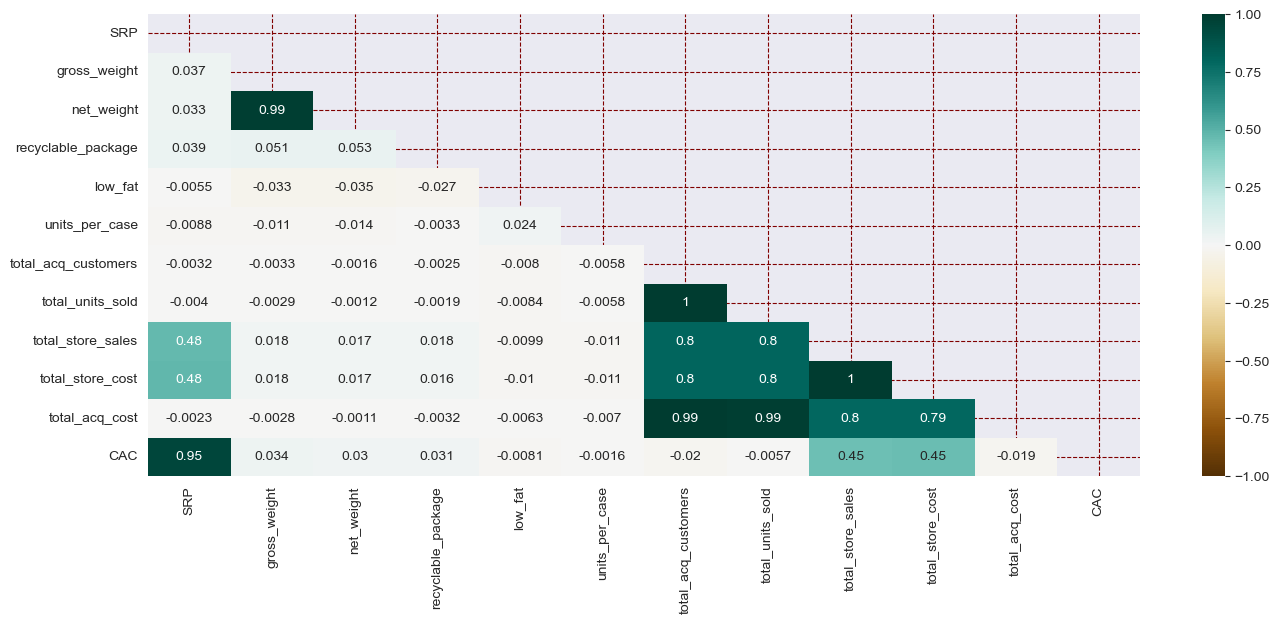

In [168]:
# Plot heat map of product level aggregated values

pd_df = productlvl_info.corr()

plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(pd_df, dtype=np.bool_))
heatmap = sns.heatmap(pd_df, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.grid(linestyle='--', color='maroon')
plt.show()

#### Plot scatter plot between CAC and SRP since their correlation is showing as high

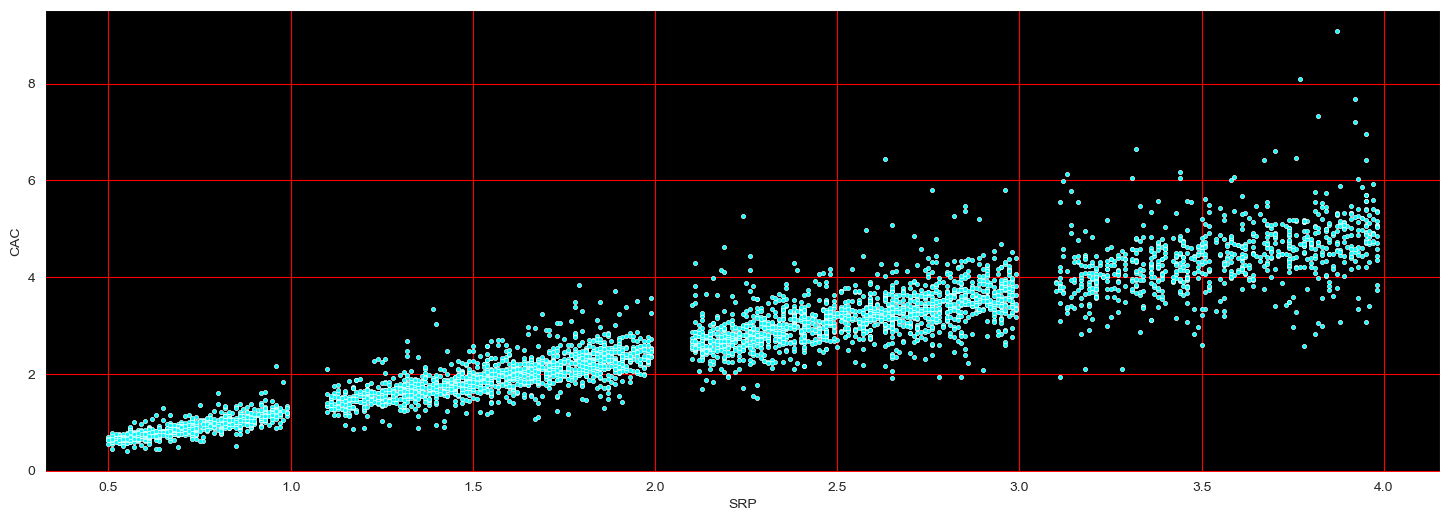

In [169]:
# Plot scatter plot between CAC and SRP since their corr. is 0.95

plt.figure(figsize=(18,6))
plt.subplot(facecolor='black')
sns.scatterplot(data=productlvl_info,
                x='SRP',
                y='CAC',
                color='cyan',
                marker='.')
plt.show()

#### Feature Engineering - Create unique id for each customer

In [170]:
#Create unique id for each customer

In [171]:
# Get the glimpse of the shape of data

df.shape

(60428, 39)

In [172]:
# Get the glimpse of the dataframe

df.head()

food_category food_department food_family  store_sales  store_cost  unit_sales         promotion_name sales_country marital_status gender  total_children            education member_card      occupation houseowner  avg_cars_at_home avg. yearly_income  num_children_at_home  brand_name   SRP  gross_weight  net_weight  recyclable_package  low_fat  units_per_case          store_type store_city store_state  store_sqft  grocery_sqft  frozen_sqft  meat_sqft  coffee_bar  video_store  salad_bar  prepared_food  florist          media_type    cost
0  Breakfast Foods    Frozen Foods        Food         7.36      2.7232         4.0           Bag Stuffers           USA              M      F             1.0  Partial High School      Normal  Skilled Manual          Y               1.0        $10K - $30K                   1.0  Carrington  1.84         19.70       17.70                 1.0      0.0            17.0  Deluxe Supermarket      Salem          OR     27694.0       18670.0       5415.0     3610.0         1.0          1.0        1.0            1.0      1.0  Daily Paper, Radio  126.62
1  Breakfast Foods    Frozen Foods        Food         5.52      2.5944         3.0  Cash Register Lottery           USA              M      M             0.0     Bachelors Degree      Silver    Professional          Y               4.0        $50K - $70K                   0.0  Carrington  1.84         19.70       17.70                 1.0      0.0            17.0  Deluxe Supermarket      Salem          OR     27694.0       18670.0       5415.0     3610.0         1.0          1.0        1.0            1.0      1.0  Daily Paper, Radio   59.86
2  Breakfast Foods    Frozen Foods        Food         3.68      1.3616         2.0    High Roller Savings           USA              S      F             4.0  Partial High School      Normal          Manual          N               1.0        $10K - $30K                   0.0  Carrington  1.84         19.70       17.70                 1.0      0.0            17.0  Deluxe Supermarket      Salem          OR     27694.0       18670.0       5415.0     3610.0         1.0          1.0        1.0            1.0      1.0  Daily Paper, Radio   84.16
3  Breakfast Foods    Frozen Foods        Food         3.68      1.1776         2.0  Cash Register Lottery           USA              M      F             2.0   High School Degree      Bronze          Manual          Y               2.0        $30K - $50K                   2.0  Carrington  1.84         19.70       17.70                 1.0      0.0            17.0  Deluxe Supermarket      Salem          OR     27694.0       18670.0       5415.0     3610.0         1.0          1.0        1.0            1.0      1.0     In-Store Coupon   95.78
4  Breakfast Foods    Frozen Foods        Food         4.08      1.4280         3.0       Double Down Sale           USA              M      M             0.0  Partial High School      Bronze  Skilled Manual          N               2.0        $30K - $50K                   0.0      Golden  1.36          7.12        5.11                 0.0      1.0            29.0  Deluxe Supermarket      Salem          OR     27694.0       18670.0       5415.0     3610.0         1.0          1.0        1.0            1.0      1.0               Radio   50.79

In [173]:
# Find out the fields that will uniquely identify each record

t = df.groupby(['food_category',
            'store_sales',
            'store_cost',
            'education',
            'marital_status',
            'gender',
            'total_children',
            'brand_name',
            'cost']).count().reset_index()

t.shape

(60428, 39)

In [174]:
# Define hash function to generate hash values from string input

def generate_id(s):
    return abs(hash(s)) % (10 ** 11)

# String manipulation function to remove the white space from the string

def replacespaces(s):
    return re.sub('\s+', '', s)

# String manipulation function to remove the dots from the string

def replacedots(s):
    return re.sub('\.', '', s)


In [175]:
# Create a hashable column that will uniquely identify each row and then generate the cust_id using hash

df['cust_tohash'] = \
                 (df['food_category'] +\
                 df['store_sales'].astype('str') +
                 df['store_cost'].astype('str') +
                 df['education'] +
                 df['marital_status'] +
                 df['gender'] +
                 df['total_children'].astype('str') +
                 df['brand_name'] +
                 df['cost'].astype('str'))
df['cust_tohash'] = df['cust_tohash'].apply(replacespaces)
df['cust_tohash'] = df['cust_tohash'].apply(replacedots)
df['cust_id'] = df['cust_tohash'].apply(generate_id)
first_column = df.pop('cust_id')
df.insert(0, 'cust_id', first_column)
#df = df.drop(['cust_tohash'], axis=1)

In [176]:
# Get the glimpse of the dataframe

df.shape

(60428, 41)

In [177]:
# Check if the cust id is uniquily identifying the each row

df['cust_id'].nunique()

60428

In [178]:
# Create a new working copy of the dataframe

df_new = df.copy()

In [179]:
# Drop hashable string column as it is no longer needed

df_new = df_new.drop(['cust_tohash'], axis=1)

In [180]:
# Get the glimpse of the shape of dataframe

df_new.shape

(60428, 40)

In [181]:
# Get the glimpse of the dataframe

df_new.head()

cust_id    food_category food_department food_family  store_sales  store_cost  unit_sales         promotion_name sales_country marital_status gender  total_children            education member_card      occupation houseowner  avg_cars_at_home avg. yearly_income  num_children_at_home  brand_name   SRP  gross_weight  net_weight  recyclable_package  low_fat  units_per_case          store_type store_city store_state  store_sqft  grocery_sqft  frozen_sqft  meat_sqft  coffee_bar  video_store  salad_bar  prepared_food  florist          media_type    cost
0  41171530997  Breakfast Foods    Frozen Foods        Food         7.36      2.7232         4.0           Bag Stuffers           USA              M      F             1.0  Partial High School      Normal  Skilled Manual          Y               1.0        $10K - $30K                   1.0  Carrington  1.84         19.70       17.70                 1.0      0.0            17.0  Deluxe Supermarket      Salem          OR     27694.0       18670.0       5415.0     3610.0         1.0          1.0        1.0            1.0      1.0  Daily Paper, Radio  126.62
1  67466157176  Breakfast Foods    Frozen Foods        Food         5.52      2.5944         3.0  Cash Register Lottery           USA              M      M             0.0     Bachelors Degree      Silver    Professional          Y               4.0        $50K - $70K                   0.0  Carrington  1.84         19.70       17.70                 1.0      0.0            17.0  Deluxe Supermarket      Salem          OR     27694.0       18670.0       5415.0     3610.0         1.0          1.0        1.0            1.0      1.0  Daily Paper, Radio   59.86
2  45015309330  Breakfast Foods    Frozen Foods        Food         3.68      1.3616         2.0    High Roller Savings           USA              S      F             4.0  Partial High School      Normal          Manual          N               1.0        $10K - $30K                   0.0  Carrington  1.84         19.70       17.70                 1.0      0.0            17.0  Deluxe Supermarket      Salem          OR     27694.0       18670.0       5415.0     3610.0         1.0          1.0        1.0            1.0      1.0  Daily Paper, Radio   84.16
3  89514573194  Breakfast Foods    Frozen Foods        Food         3.68      1.1776         2.0  Cash Register Lottery           USA              M      F             2.0   High School Degree      Bronze          Manual          Y               2.0        $30K - $50K                   2.0  Carrington  1.84         19.70       17.70                 1.0      0.0            17.0  Deluxe Supermarket      Salem          OR     27694.0       18670.0       5415.0     3610.0         1.0          1.0        1.0            1.0      1.0     In-Store Coupon   95.78
4  20531560779  Breakfast Foods    Frozen Foods        Food         4.08      1.4280         3.0       Double Down Sale           USA              M      M             0.0  Partial High School      Bronze  Skilled Manual          N               2.0        $30K - $50K                   0.0      Golden  1.36          7.12        5.11                 0.0      1.0            29.0  Deluxe Supermarket      Salem          OR     27694.0       18670.0       5415.0     3610.0         1.0          1.0        1.0            1.0      1.0               Radio   50.79

In [182]:
# Get statistial details for numerical parameters of the newly created dataframe

df_new.describe()

cust_id   store_sales    store_cost    unit_sales  total_children  avg_cars_at_home  num_children_at_home           SRP  gross_weight    net_weight  recyclable_package       low_fat  units_per_case    store_sqft  grocery_sqft   frozen_sqft     meat_sqft    coffee_bar   video_store     salad_bar  prepared_food       florist          cost
count  6.042800e+04  60428.000000  60428.000000  60428.000000    60428.000000      60428.000000          60428.000000  60428.000000  60428.000000  60428.000000        60428.000000  60428.000000    60428.000000  60428.000000  60428.000000  60428.000000  60428.000000  60428.000000  60428.000000  60428.000000   60428.000000  60428.000000  60428.000000
mean   5.010055e+10      6.541031      2.619460      3.093169        2.533875          2.200271              0.829351      2.115258     13.806433     11.796289            0.558665      0.350434       18.860694  27988.477494  19133.799696   5312.852552   3541.846280      0.612646      0.354157      0.587956       0.587956      0.562603     99.262366
std    2.890748e+10      3.463047      1.453009      0.827677        1.490165          1.109644              1.303424      0.932829      4.622693      4.682986            0.496551      0.477110       10.258555   5701.022090   3987.395735   1575.907263   1050.471635      0.487150      0.478261      0.492207       0.492207      0.496069     30.011257
min    2.134535e+06      0.510000      0.163200      1.000000        0.000000          0.000000              0.000000      0.500000      6.000000      3.050000            0.000000      0.000000        1.000000  20319.000000  13305.000000   2452.000000   1635.000000      0.000000      0.000000      0.000000       0.000000      0.000000     50.790000
25%    2.503657e+10      3.810000      1.500000      3.000000        1.000000          1.000000              0.000000      1.410000      9.700000      7.710000            0.000000      0.000000       10.000000  23593.000000  16232.000000   4746.000000   3164.000000      0.000000      0.000000      0.000000       0.000000      0.000000     69.650000
50%    5.007573e+10      5.940000      2.385600      3.000000        3.000000          2.000000              0.000000      2.130000     13.600000     11.600000            1.000000      0.000000       19.000000  27694.000000  18670.000000   5062.000000   3375.000000      1.000000      0.000000      1.000000       1.000000      1.000000     98.520000
75%    7.521343e+10      8.670000      3.484025      4.000000        4.000000          3.000000              1.000000      2.790000     17.700000     16.000000            1.000000      1.000000       28.000000  30797.000000  22123.000000   5751.000000   3834.000000      1.000000      1.000000      1.000000       1.000000      1.000000    126.620000
max    9.999084e+10     22.920000      9.726500      6.000000        5.000000          4.000000              5.000000      3.980000     21.900000     20.800000            1.000000      1.000000       36.000000  39696.000000  30351.000000   9184.000000   6122.000000      1.000000      1.000000      1.000000       1.000000      1.000000    149.750000

In [183]:
# Import necessary packages

from scipy import stats

#### Outliers Detection

- Z-score methhod
- Quantile distribution
- Isolation Forest


In [184]:
#Outliers detection z-score method

#### Outliers : Z-Score method 

In [185]:
# Define function to get the summary of outliers for all the numerical columns
# Method used is z-score

def detectOutliers_zscore(dft, features, threshold=3):
    
    outliers = pd.DataFrame()
    for feature in features:
        temp = pd.DataFrame()
        temp[feature] = dft[feature]
        temp['z_score'] = (dft[feature] - dft[feature].mean())/np.std(dft[feature])
        temp = temp.loc[abs(temp['z_score']) > threshold]
        z_threshold = threshold
        total_outliers = temp.shape[0]
        percentage_outliers = temp.shape[0]/dft.shape[0]*100
        outliers.loc[feature, 'z_threshold'] = z_threshold
        outliers.loc[feature, 'total_outliers'] = total_outliers
        outliers.loc[feature, 'total_values'] = dft.shape[0]
        outliers.loc[feature, 'percentage_outliers'] = np.round(percentage_outliers,2)
        
    ouotliers = outliers.reset_index().rename(columns={'index':'features'})
    return outliers

# Define the function to display the outliers details of individual feature

def displayOutliers_zscore(dft, feature, threshold=3):
    temp = pd.DataFrame()
    temp[feature] = dft[feature]
    temp['z_score'] = (dft[feature] - dft[feature].mean())/np.std(dft[feature])
    temp = temp.loc[abs(temp['z_score']) > threshold]
    temp['percentile'] = temp[feature].apply(
                                lambda x: stats.percentileofscore(dft[feature],x))

    return temp


In [186]:
# Collect all the relavant numerical features using df.describe().columns
# Get summary of outliers

features = ['store_sales', 'store_cost', 'unit_sales', 'total_children', 'avg_cars_at_home',
            'num_children_at_home', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package',
            'low_fat', 'units_per_case', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft',
            'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'cost']

outliers = detectOutliers_zscore(df_new, features, 3)
outliers = outliers.loc[outliers['percentage_outliers'] > 0].sort_values(
                                                                ['percentage_outliers'],
                                                                ascending=True)
outliers


z_threshold  total_outliers  total_values  percentage_outliers
unit_sales                    3.0            26.0       60428.0                 0.04
store_sales                   3.0           261.0       60428.0                 0.43
store_cost                    3.0           497.0       60428.0                 0.82
num_children_at_home          3.0          1346.0       60428.0                 2.23

#### Plot outliers percentage for relevant features using pie chart and spead of the corresponding feature

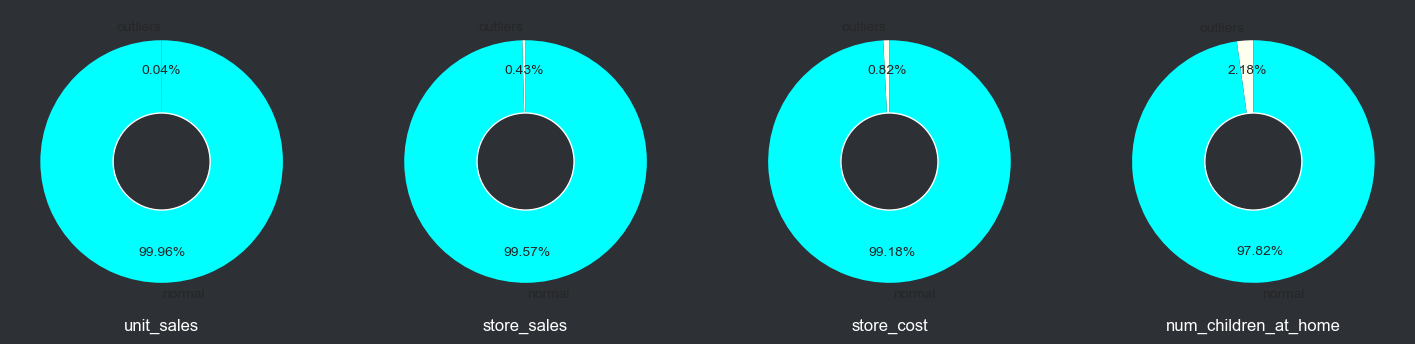

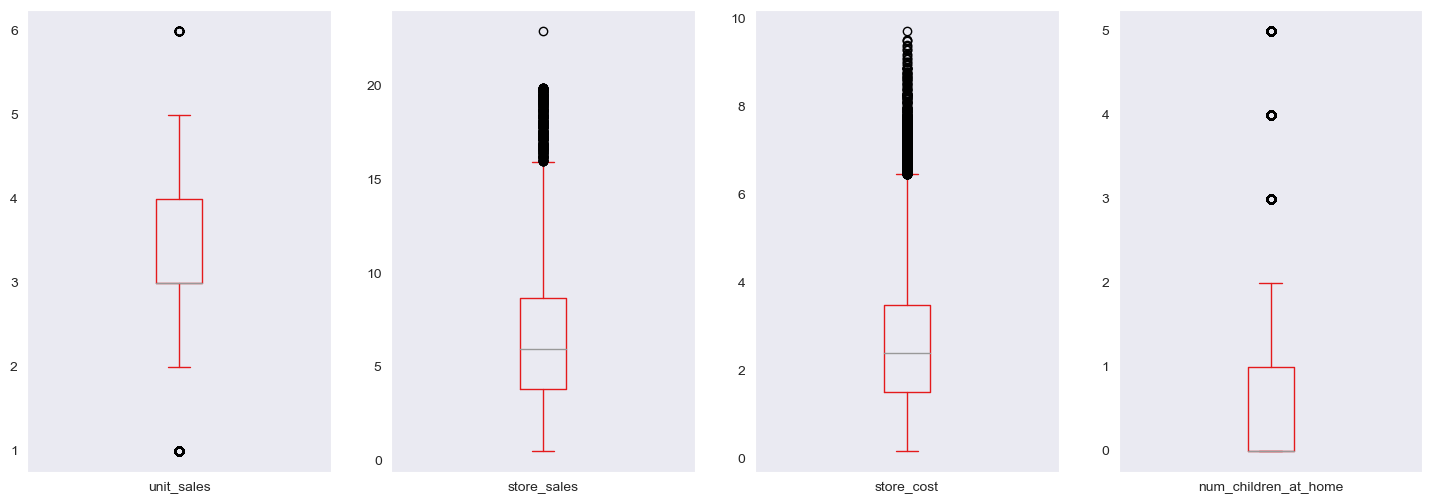

In [187]:
# Plot outliers percentage for relevant features using pie chart
# Plot spread of the corresponding feature using box plot

plt.figure(figsize=(18,5),
           facecolor='#2d3035')
explode = (0, 0)
k = 1
m = len(outliers.index)
for i in outliers.index:
    plt.subplot(1,m,k,facecolor='black')
    plt.pie([outliers.loc[i].total_outliers,
         outliers.loc[i].total_values],
        labels=['outliers', 'normal'],
        colors=['ivory', 'cyan'],
        explode=explode,
        autopct = '%1.2f%%',
        pctdistance=0.75,
        startangle = 90, 
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 0,
                      'antialiased': True})
    
    centre_circle = plt.Circle((0, 0), 0.40, fc='#2d3035')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.xlabel(i,color='white',size=12)
    k += 1

plt.show()

sns.set_style('dark')
df_new[outliers.index].plot(subplots=True, kind='box',figsize=(18,6),colormap='Set1')
plt.show()

In [188]:
# Check outliers for individual feature - unit sales

outliers = displayOutliers_zscore(df_new, 'unit_sales', 3)
outliers = outliers.sort_values(['unit_sales'], ascending=True)
print(f'Number of outliers : {outliers.shape[0]}')
outliers.head()

Number of outliers : 26


unit_sales   z_score  percentile
95            6.0  3.512065   99.979314
55646         6.0  3.512065   99.979314
53609         6.0  3.512065   99.979314
52137         6.0  3.512065   99.979314
50824         6.0  3.512065   99.979314

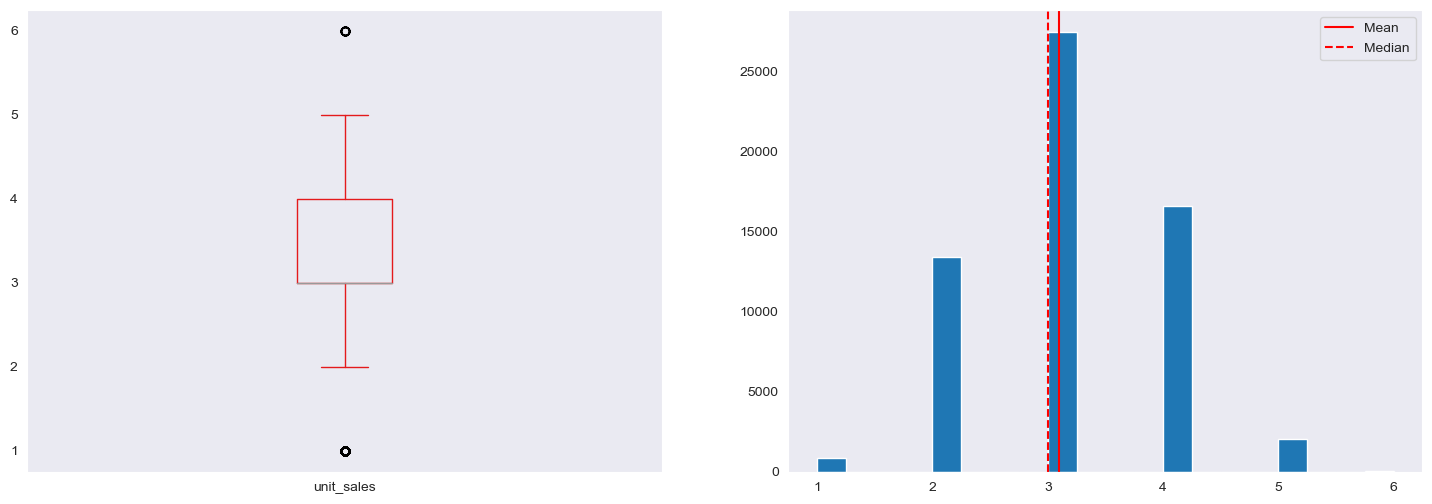

In [189]:
# Plot spread and distribution of unit-sales along with mean and median

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
#df_new.boxplot(column='unit_sales')
df_new['unit_sales'].plot(subplots=True, kind='box',colormap='Set1')
plt.grid(linestyle='',color='black')
plt.subplot(1,2,2)
df_new['unit_sales'].hist(bins=20)
plt.axvline(np.mean(df_new['unit_sales']), ls='-', c='r', label="Mean")
plt.axvline(np.median(df_new['unit_sales']), ls='--', c='r', label="Median")
plt.legend()
plt.grid(linestyle='',color='black')
plt.show()

In [190]:
# Check outliers for individual feature store_sales

outliers = displayOutliers_zscore(df_new, 'store_sales')
outliers = outliers.sort_values(['store_sales'], ascending=True)
print(f'Number of outliers : {outliers.shape[0]}')
outliers.head()

Number of outliers : 261


store_sales   z_score  percentile
31538        16.95  3.005751   99.571391
20717        16.95  3.005751   99.571391
47742        16.95  3.005751   99.571391
13758        17.00  3.020189   99.574700
23130        17.04  3.031740   99.576355

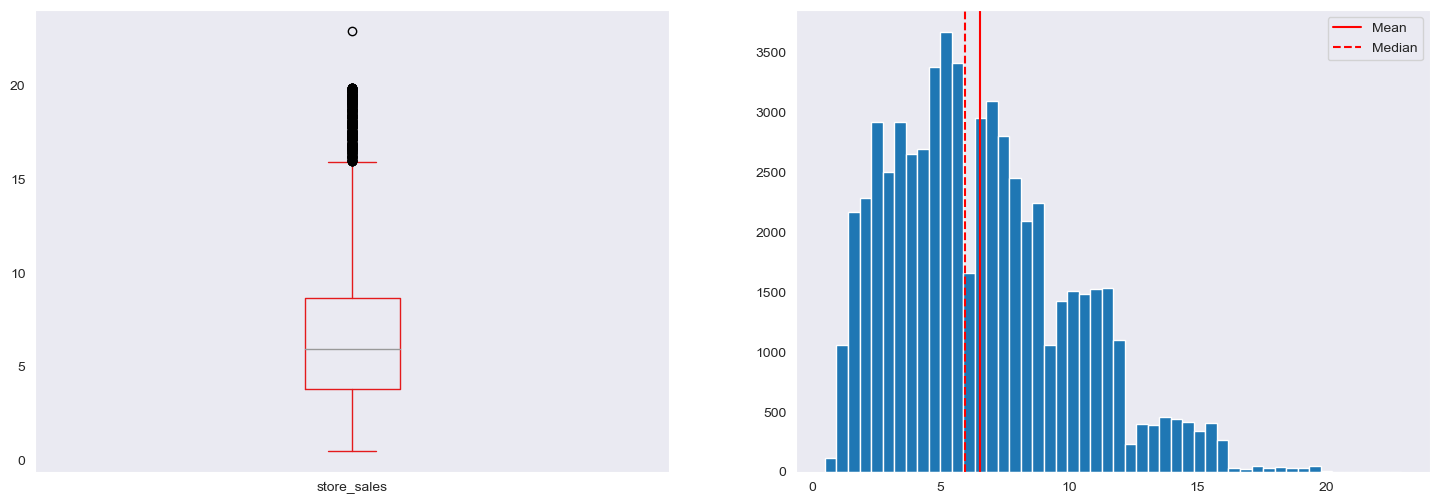

In [191]:
# Plot spread and distribution of feature store sales along with mean and median

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
#df_new.boxplot(column='store_sales')
df_new['store_sales'].plot(subplots=True, kind='box',colormap='Set1')
plt.grid(linestyle='',color='black')
plt.subplot(1,2,2)
df_new['store_sales'].hist(bins=50)
plt.axvline(np.mean(df_new['store_sales']), ls='-', c='r', label="Mean")
plt.axvline(np.median(df_new['store_sales']), ls='--', c='r', label="Median")
plt.legend()
plt.grid(linestyle='',color='black')
plt.show()

In [192]:
# Check outliers for individual feature store cost

outliers = displayOutliers_zscore(df_new, 'store_cost')
outliers = outliers.sort_values(['store_cost'], ascending=True)
print(f'Number of outliers : {outliers.shape[0]}')
outliers.head()

Number of outliers : 497


store_cost   z_score  percentile
14915      6.9800  3.001067   99.179188
59378      6.9825  3.002788   99.180843
6894       6.9840  3.003820   99.183326
30826      6.9840  3.003820   99.183326
11617      6.9872  3.006022   99.186635

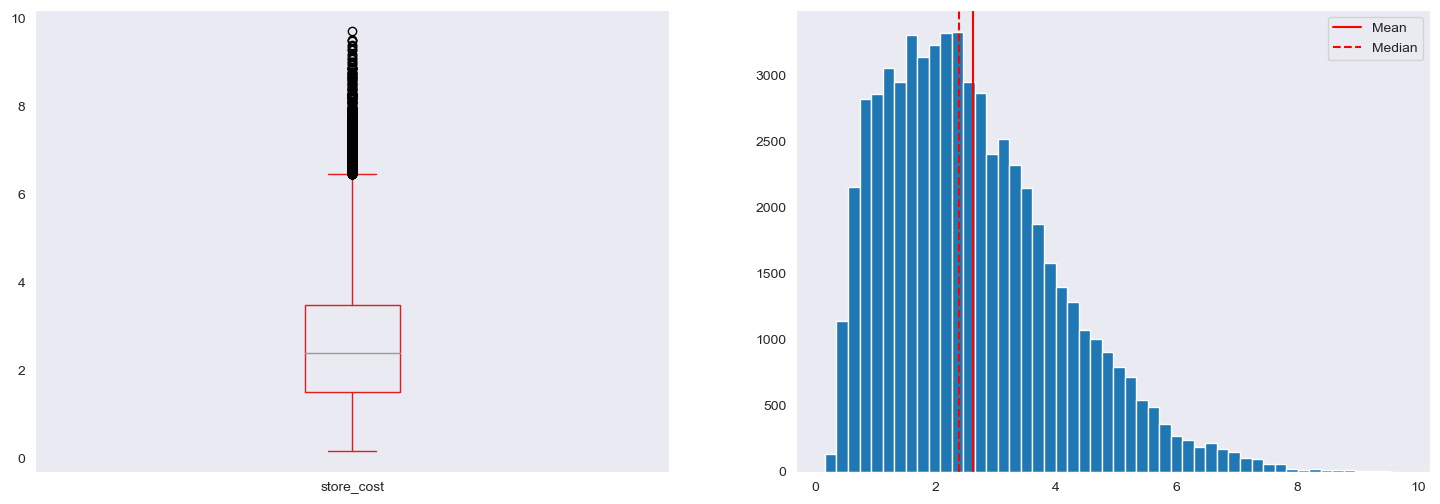

In [193]:
# Plot spread and distribution of store cost along with mean and median

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
#df_new.boxplot(column='store_cost')
df_new['store_cost'].plot(subplots=True, kind='box',colormap='Set1')
plt.grid(linestyle='',color='black')
plt.subplot(1,2,2)
df_new['store_cost'].hist(bins=50)
plt.axvline(np.mean(df_new['store_cost']), ls='-', c='r', label="Mean")
plt.axvline(np.median(df_new['store_cost']), ls='--', c='r', label="Median")
plt.legend()
plt.grid(linestyle='',color='black')
plt.show()

In [194]:
# Check outliers for individual feature number of children at home

outliers = displayOutliers_zscore(df_new, 'num_children_at_home')
outliers = outliers.sort_values(['num_children_at_home'], ascending=True)
print(f'Number of outliers : {outliers.shape[0]}')
outliers.head()

Number of outliers : 1346


num_children_at_home   z_score  percentile
28                      5.0  3.199791   98.887105
40181                   5.0  3.199791   98.887105
40180                   5.0  3.199791   98.887105
40123                   5.0  3.199791   98.887105
40122                   5.0  3.199791   98.887105

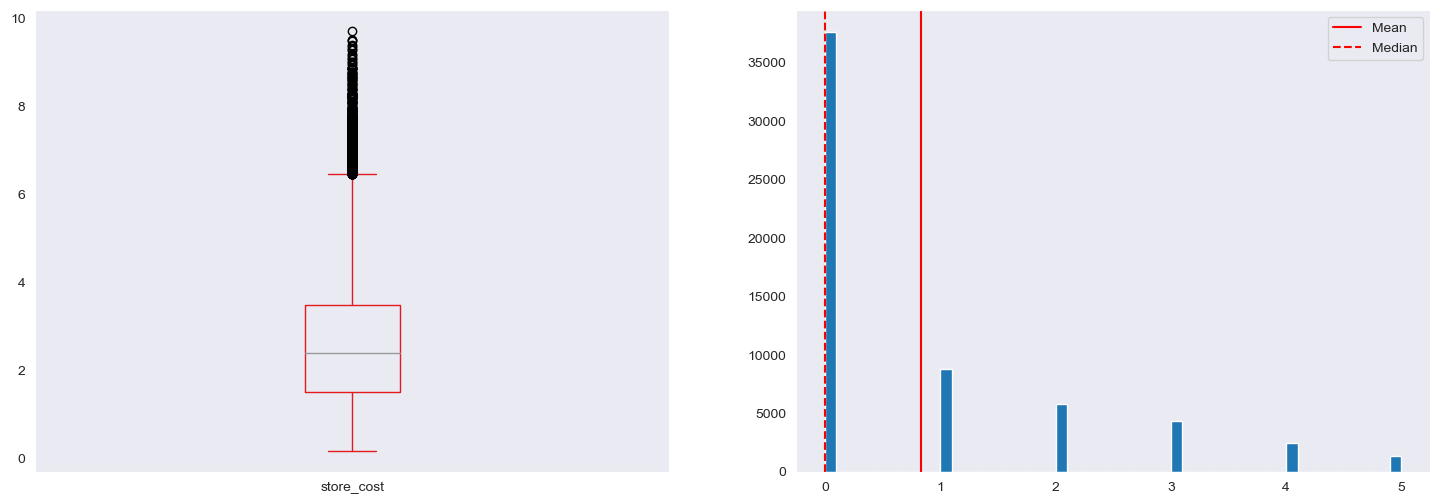

In [195]:
# Plot spread and distribution of feature number of children at home along with mean and median

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
#df_new.boxplot(column='num_children_at_home')
df_new['store_cost'].plot(subplots=True, kind='box',colormap='Set1')
plt.grid(linestyle='',color='black')
plt.subplot(1,2,2)
df_new['num_children_at_home'].hist(bins=50)
plt.axvline(np.mean(df_new['num_children_at_home']), ls='-', c='r', label="Mean")
plt.axvline(np.median(df_new['num_children_at_home']), ls='--', c='r', label="Median")
plt.legend()
plt.grid(linestyle='',color='black')
plt.show()

#### Outliers: Quantile Distibution

In [196]:
#Quantile distribution

In [197]:
# Define function to get the summary of outliers for all numerical features
# Method used is quantile distribution

def detectOutliers_IQR(dft, features):
    temp = pd.DataFrame()
    for feature in features:
        q1 = dft[feature].quantile(0.25)
        q3 = dft[feature].quantile(0.75)
        iqr = q3 - q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        totalOutliers = dft.loc[(dft[feature] > ul) | (dft[feature] < ll)].shape[0]
        percentageOutliers = np.round(totalOutliers/dft.shape[0]*100,4)
        temp.loc[feature, 'Q1'] = np.round(q1,3)
        temp.loc[feature, 'Q3'] = np.round(q3,3)
        temp.loc[feature, 'IQR'] = np.round(iqr,3)
        temp.loc[feature, 'lower_limit'] = np.round(ll,3)
        temp.loc[feature, 'upper_limit'] = np.round(ul,3)
        temp.loc[feature, 'total_values'] = dft.shape[0]
        temp.loc[feature, 'total_outliers'] = np.round(totalOutliers,3)
        temp.loc[feature, 'percentage_outliers'] = np.round(percentageOutliers,3)
    
    return temp

In [198]:
# Collect relevant numerical features using df.describe().columns
# Get the outliers summary by calling relevant function

features = ['store_sales', 'store_cost', 'unit_sales', 'total_children', 'avg_cars_at_home',
            'num_children_at_home', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package',
            'low_fat', 'units_per_case', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft',
            'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'cost']

outliers = detectOutliers_IQR(df_new, features)
outliers = outliers.loc[outliers['percentage_outliers'] > 0]
outliers.sort_values(['percentage_outliers'], ascending=False)

Q1        Q3       IQR  lower_limit  upper_limit  total_values  total_outliers  percentage_outliers
frozen_sqft           4746.00  5751.000  1005.000     3238.500      7258.50       60428.0          9996.0               16.542
meat_sqft             3164.00  3834.000   670.000     2159.000      4839.00       60428.0          9996.0               16.542
num_children_at_home     0.00     1.000     1.000       -1.500         2.50       60428.0          8167.0               13.515
store_cost               1.50     3.484     1.984       -1.476         6.46       60428.0           986.0                1.632
unit_sales               3.00     4.000     1.000        1.500         5.50       60428.0           890.0                1.473
store_sales              3.81     8.670     4.860       -3.480        15.96       60428.0           325.0                0.538

#### Plot percentage of outliers and spread of relevant features using pie chart and box plot

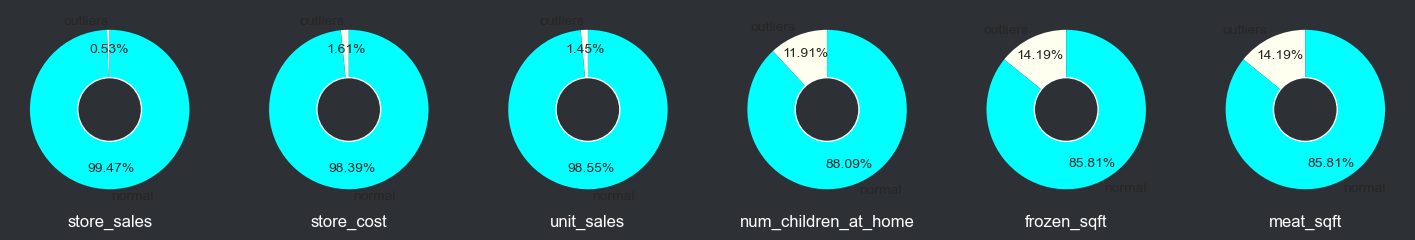

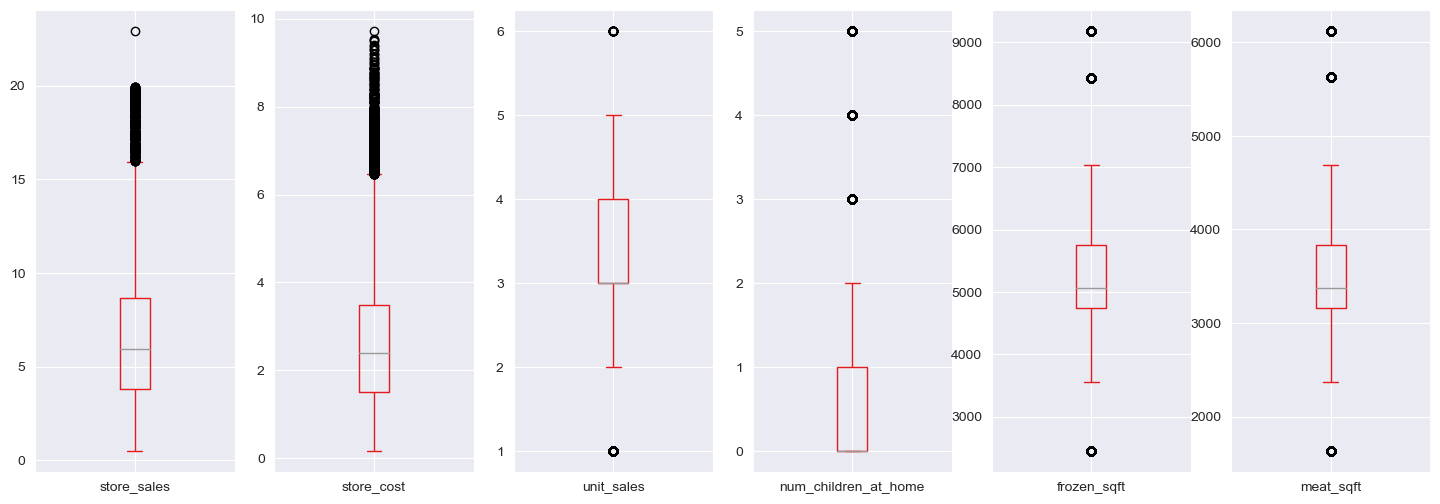

In [199]:
# Plot percentage of outliers and spread of relevant features using pie chart and box plot

plt.figure(figsize=(18,5),facecolor='#2d3035')
explode = (0, 0)
k = 1
m = len(outliers.index)
for i in outliers.index:
    plt.subplot(1,m,k,facecolor='black')
    plt.pie([outliers.loc[i].total_outliers,
         outliers.loc[i].total_values],
        labels=['outliers', 'normal'],
        colors=['ivory', 'cyan'],
        explode=explode,
        autopct = '%1.2f%%',
        pctdistance=0.75,
        startangle = 90, 
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 0,
                      'antialiased': True})
    
    centre_circle = plt.Circle((0, 0), 0.40, fc='#2d3035')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.xlabel(i,color='white',size=12)
    k += 1

plt.show()

sns.set_style('darkgrid')
df_new[outliers.index].plot(subplots=True, kind='box',figsize=(18,6),colormap='Set1')
plt.show()

#### Outliers: Isolation Forest method

In [200]:
#Islolation Forest

In [201]:
# Import necessary library

from sklearn.ensemble import IsolationForest

In [202]:
# Define a function to get outlier summary for all numerical features using isolation forest method

def detectOutliers_IF(dft, features, contamination=0.01):
    model=IsolationForest(n_estimators=100,
                          max_samples='auto',
                          contamination=contamination,
                          random_state=42)
    outliers = pd.DataFrame()
    for feature in features:
        temp = pd.DataFrame()
        temp[feature] = dft[feature]
        model.fit(dft[[feature]])
        #temp['scores'] = model.decision_function(dft[[feature]])
        temp['anomaly_score'] = model.predict(dft[[feature]])
        temp = temp.loc[temp['anomaly_score'] == -1]
        total_outliers = temp.shape[0]
        percentage_outliers = np.round(temp.shape[0]/dft.shape[0]*100,3)
        outliers.loc[feature, 'contanimation_percentage'] = contamination*100
        outliers.loc[feature, 'total_outliers'] = total_outliers
        outliers.loc[feature, 'total_values'] = dft.shape[0]
        outliers.loc[feature, 'percentage_outliers'] = percentage_outliers
    return outliers

In [203]:
# Collect all relevant numerical features using df.describe().columns

features = ['store_sales', 'store_cost', 'unit_sales', 'total_children', 'avg_cars_at_home',
            'num_children_at_home', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package',
            'low_fat', 'units_per_case', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft',
            'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'cost']

outliers = detectOutliers_IF(df_new, features, contamination=0.005)

In [204]:
outliers = outliers.loc[outliers['percentage_outliers'] > 0]
outliers

contanimation_percentage  total_outliers  total_values  percentage_outliers
store_sales                        0.5           302.0       60428.0                0.500
store_cost                         0.5           301.0       60428.0                0.498
SRP                                0.5           280.0       60428.0                0.463
gross_weight                       0.5           276.0       60428.0                0.457
net_weight                         0.5           284.0       60428.0                0.470
cost                               0.5           149.0       60428.0                0.247

#### Plot percentage of outliers and spread of relevant features using pie chart and boxplot

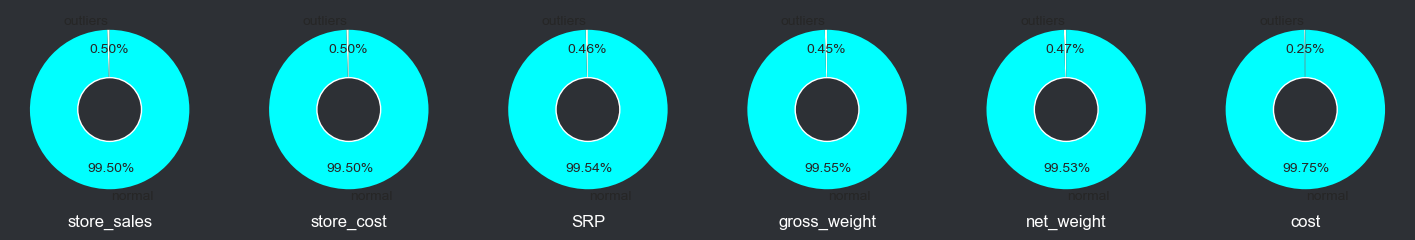

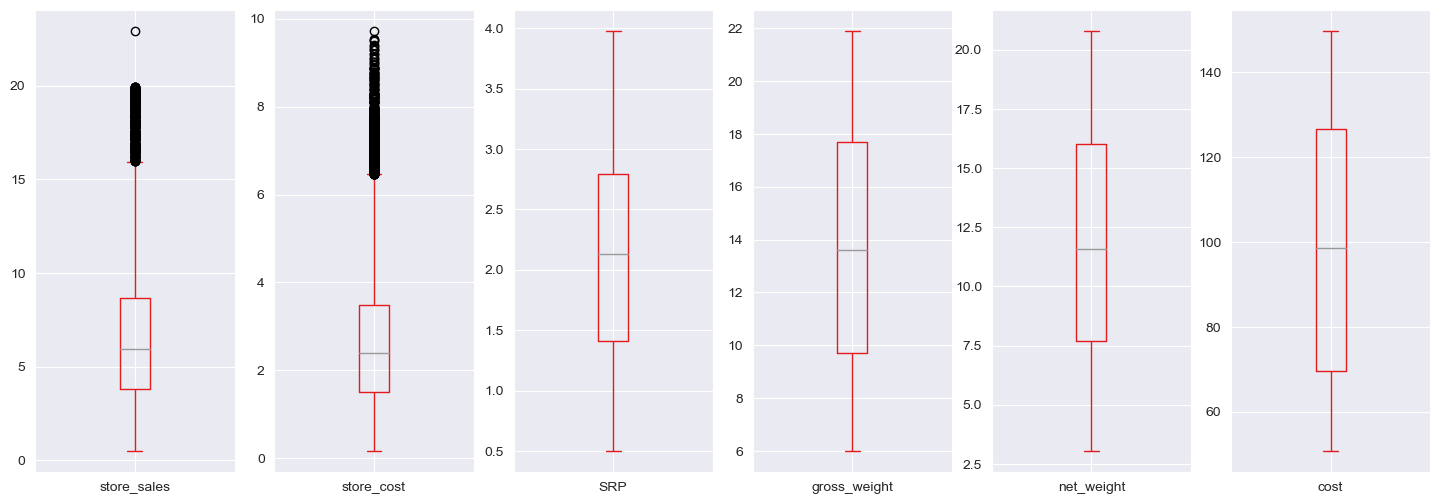

In [205]:
# Plot percentage of outliers and spread of relevant features using pie chart and boxplot

plt.figure(figsize=(18,5),facecolor='#2d3035')
explode = (0, 0)
k = 1
m = len(outliers.index)
for i in outliers.index:
    plt.subplot(1,m,k,facecolor='black')
    plt.pie([outliers.loc[i].total_outliers,
         outliers.loc[i].total_values],
        labels=['outliers', 'normal'],
        colors=['ivory', 'cyan'],
        explode=explode,
        autopct = '%1.2f%%',
        pctdistance=0.75,
        startangle = 90, 
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 0,
                      'antialiased': True})
    
    centre_circle = plt.Circle((0, 0), 0.40, fc='#2d3035')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.xlabel(i,color='white', size=12)
    k += 1

plt.show()

sns.set_style('darkgrid')
df_new[outliers.index].plot(subplots=True, kind='box',figsize=(18,6),colormap='Set1')
plt.show()

In [206]:
#Dave the dataframe to build the model
#df_new.to_csv('./Data/cos_predict.csv', index=None)